# Увеличение покупательской активности через персонализированные предложения в интернет-магазине

В этом проекте я собираюсь разработать решение для интернет-магазина «В один клик», которое поможет увеличить покупательскую активность постоянных клиентов через персонализированные предложения. Моя задача включает в себя следующие этапы:

**Сбор данных**

Я соберу данные по клиентам, включая признаки, которые описывают коммуникацию сотрудников компании с клиентом, продуктовое поведение покупателя, покупательское поведение клиента и поведение покупателя на сайте.

**Моделирование**

Я разработаю модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца. Я включу в исследование дополнительные данные финансового департамента о прибыльности клиента.

**Сегментация клиентов**

Используя данные модели и данные о прибыльности клиентов, я выделю сегменты покупателей и разработаю для них персонализированные предложения.

**Анализ сегментов**

Я выделю сегмент покупателей, проанализирую его и предложу, как увеличить его покупательскую активность. Я буду использовать данные моделирования, данные о прибыли покупателей и исходные данные.

Моя работа будет важным шагом к увеличению активности покупателей и улучшению бизнес-результатов интернет-магазина «В один клик».


# Шаг 1. Загрузка данных

In [1]:
# импортировать необходимые библиотеки
from phik import resources, report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler,
)
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import shap

In [2]:
# Загрузка данных
market_file = pd.read_csv('datasets\\market_file.csv')
market_money = pd.read_csv('datasets\\market_money.csv')
market_time = pd.read_csv('datasets\\market_time.csv')
money = pd.read_csv('datasets\\money.csv', sep=';', decimal=',')

In [3]:
print("Данные о поведении покупателя:")
display(market_file.head())
print("\nДанные о выручке:")
display(market_money.head())
print("\nДанные о времени, проведенном на сайте:")
display(market_time.head())
print("\nДанные о прибыли:")
display(money.head())


Данные о поведении покупателя:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2



Данные о выручке:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6



Данные о времени, проведенном на сайте:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13



Данные о прибыли:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


# Выводы

После загрузки данных, мы можем сделать следующие выводы:

- **Данные о поведении покупателя**: Данные успешно загружены и содержат информацию о покупательской активности, типе сервиса, активности на маркете, длительности, акционных покупках, популярной категории, среднем просмотре категорий за визит, неоплаченных продуктах и ошибке сервиса.
- **Данные о выручке**: Данные успешно загружены и содержат информацию о выручке за разные периоды.
- **Данные о времени, проведенном на сайте**: Данные успешно загружены и содержат информацию о времени, проведенном на сайте за разные периоды.
- **Данные о прибыли**: Данные успешно загружены и содержат информацию о прибыли.

Все данные в таблицах соответствуют описанию и готовы к дальнейшему анализу.


# Шаг 2. Предобработка данных

In [4]:
# Проверка на пропущенные значения
print("Пропущенные значения в данных Market File:")
display(market_file.isnull().sum())
print("\nПропущенные значения в данных Market Money:")
display(market_money.isnull().sum())
print("\nПропущенные значения в данных Market Time:")
display(market_time.isnull().sum())
print("\nПропущенные значения в данных Money:")
display(money.isnull().sum())




Пропущенные значения в данных Market File:


id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64


Пропущенные значения в данных Market Money:


id         0
Период     0
Выручка    0
dtype: int64


Пропущенные значения в данных Market Time:


id        0
Период    0
минут     0
dtype: int64


Пропущенные значения в данных Money:


id         0
Прибыль    0
dtype: int64

Пропусков не обнаружено

In [5]:
# Проверка на дубликаты
print("\nДубликаты в данных Market File:")
display(market_file.duplicated().sum())
print("\nДубликаты в данных Market Money:")
display(market_money.duplicated().sum())
print("\nДубликаты в данных Market Time:")
display(market_time.duplicated().sum())
print("\nДубликаты в данных Money:")
display(money.duplicated().sum())


Дубликаты в данных Market File:


0


Дубликаты в данных Market Money:


0


Дубликаты в данных Market Time:


0


Дубликаты в данных Money:


0

Дубликатов не обнаружено

In [6]:
print("Общая информация о данных Market File:")
market_file.info()
print("\nОбщая информация о данных Market Money:")
market_money.info()
print("\nОбщая информация о данных Market Time:")
market_time.info()
print("\nОбщая информация о данных Money:")
money.info()


Общая информация о данных Market File:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int6

Данные состоят из четырех наборов данных: `Market File`, `Market Money`, `Market Time` и `Money`. Вот краткий обзор каждого из них:

1. **Market File**: Этот набор данных содержит 1300 записей с 13 столбцами. Столбцы включают в себя различные характеристики, такие как 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать' и другие. Все столбцы имеют непустые значения.

2. **Market Money**: Этот набор данных содержит 3900 записей с 3 столбцами: 'id', 'Период' и 'Выручка'. Все столбцы имеют непустые значения.

3. **Market Time**: Этот набор данных содержит 2600 записей с 3 столбцами: 'id', 'Период' и 'минут'. Все столбцы имеют непустые значения.

4. **Money**: Этот набор данных содержит 1300 записей с 2 столбцами: 'id' и 'Прибыль'. Все столбцы имеют непустые значения.

Все наборы данных имеют столбец 'id', который, вероятно, может быть использован для связывания данных между наборами. Пожалуйста, убедитесь, что вы проводите дополнительный анализ данных, чтобы лучше понять их и определить, какие дальнейшие шаги следует предпринять.

In [7]:
dataframes = [market_file, market_money, market_time, money]



In [8]:
# Выявление уникальных значений категориальных столбцов
for df in dataframes:
    for column in df.select_dtypes(include=['object']).columns:
        print(f'Уникальные значения для {column}:')
        print(df[column].unique())

Уникальные значения для Покупательская активность:
['Снизилась' 'Прежний уровень']
Уникальные значения для Тип сервиса:
['премиум' 'стандартт' 'стандарт']
Уникальные значения для Разрешить сообщать:
['да' 'нет']
Уникальные значения для Популярная_категория:
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Уникальные значения для Период:
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
Уникальные значения для Период:
['текущий_месяц' 'предыдцщий_месяц']


In [9]:
# Замена опечатки в столбце "Тип сервиса"
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')

# Проверка уникальных значений для проверки
print(market_file['Тип сервиса'].unique())

# Замена опечатки в столбце 'Период'
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

print(market_time['Период'].unique())

['премиум' 'стандарт']
['текущий_месяц' 'предыдущий_месяц']


В процессе анализа была обнаружена и исправлена опечатка в столбце “Тип сервиса” в наборе данных Market File и в столбце 'Период' в наборе данных Market time.

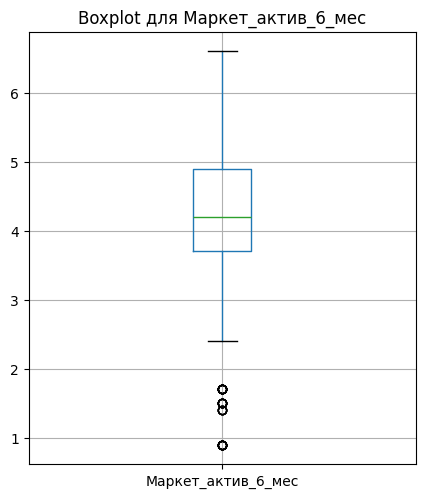

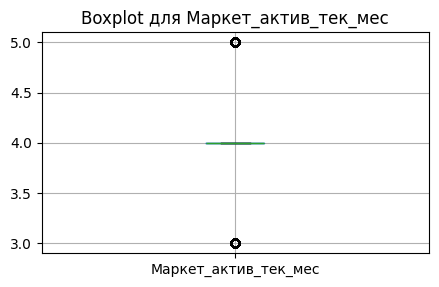

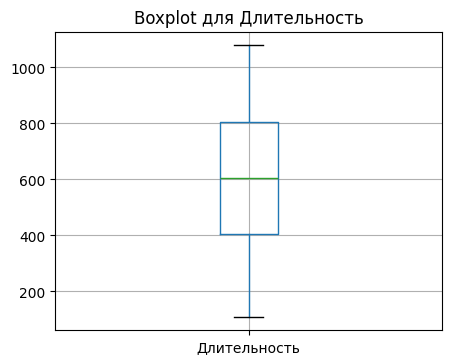

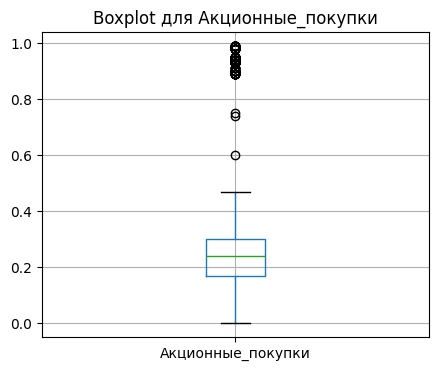

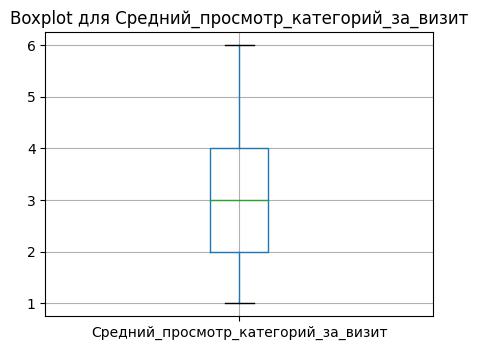

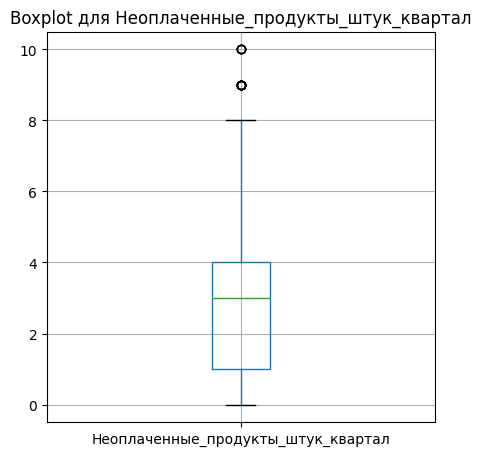

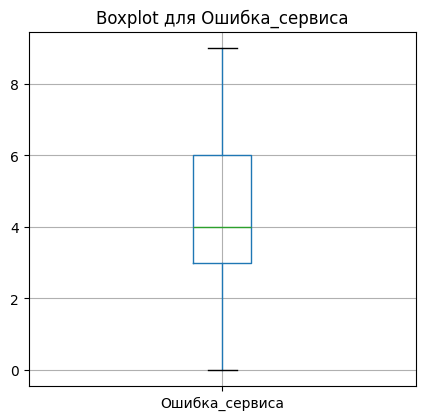

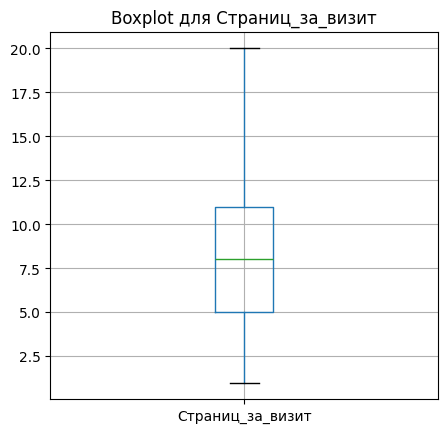

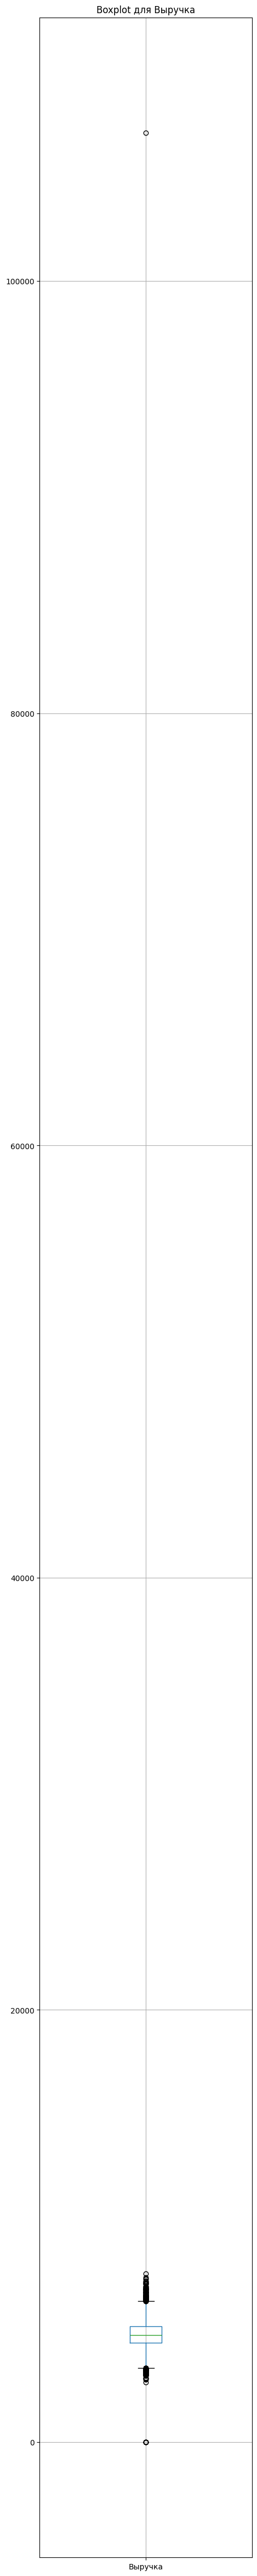

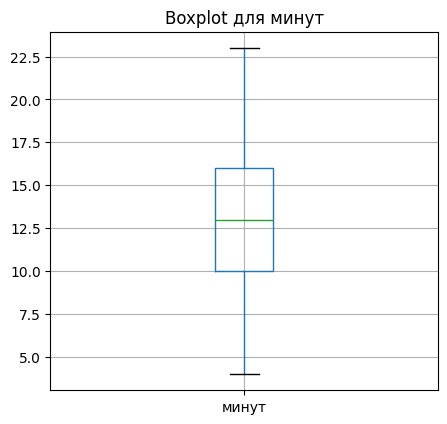

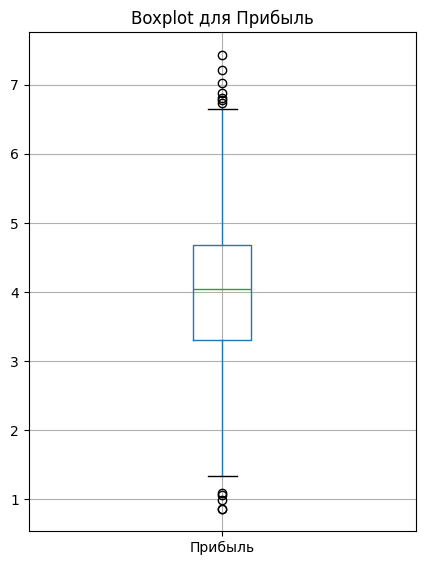

In [10]:
# Проверка на выбросы с помощью boxplot
for df in dataframes:
    for column in df.select_dtypes(include=[np.number]).columns:
        if column != 'id':
            # Вычисление размаха данных
            data_range = df[column].max() - df[column].min()
            
            # Настройка размера графика в зависимости от размаха данных
            plt.figure(figsize=(5, data_range / df[column].std()))
            
            df.boxplot([column])
            plt.title(f'Boxplot для {column}')
            plt.show()


In [11]:
# Вывод строк перед удалением
print(market_money[market_money['Выручка'] > 100000])




        id         Период   Выручка
98  215380  текущий_месяц  106862.2


In [12]:
id_value = 215380

print("Данные о поведении покупателя для id 215380:")
display(market_file[market_file['id'] == id_value])

print("\nДанные о выручке для id 215380:")
display(market_money[market_money['id'] == id_value])

print("\nДанные о времени, проведенном на сайте для id 215380:")
display(market_time[market_time['id'] == id_value])

print("\nДанные о прибыли для id 215380:")
display(money[money['id'] == id_value])


Данные о поведении покупателя для id 215380:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7



Данные о выручке для id 215380:


,id,Период,Выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2



Данные о времени, проведенном на сайте для id 215380:


,id,Период,минут
64,215380,предыдущий_месяц,12
65,215380,текущий_месяц,14



Данные о прибыли для id 215380:


,id,Прибыль
32,215380,3.88


Наблюдения о покупателе с id 215380 указывают на возможную аномалию в данных. Выручка за текущий месяц значительно выше, чем в предыдущие месяцы, в то время как покупательская активность снизилась. Это может указывать на ошибку в данных или на необычное поведение покупателя.

Удаление только информации за текущий месяц может исказить общую картину поведения покупателя и повлиять на обучение модели. Возможно, будет лучше удалить все данные этого покупателя из всех таблиц, чтобы обеспечить целостность и точность анализа.

In [13]:
id_value = 215380

market_file = market_file[market_file['id'] != id_value]
market_money = market_money[market_money['id'] != id_value]
market_time = market_time[market_time['id'] != id_value]
money = money[money['id'] != id_value]


Удаляем значения, которые больше 100000, из столбца "Выручка". Вот почему это важно:

- **Значения больше 100000**: Эти значения могут быть аномалиями или выбросами, которые могут исказить результаты анализа данных. Они могут быть результатом ошибок ввода данных или могут представлять редкие события. В любом случае, они могут сделать модель менее точной, если они не обрабатываются должным образом.

Поэтому очистка данных от этих значений может помочь улучшить качество  модели и сделать анализ данных более точным.

В ходе предобработки данных было обнаружено, что данные в целом выглядят нормально, кроме некоторых моментов которые были исправлены. Вот некоторые ключевые выводы:

1. **Пропуски и дубликаты**: В данных не обнаружено пропусков или дубликатов, что говорит о высоком качестве данных.

2. **Категориальные данные**: Категориальные данные, были обнаружены и исправлены опечатки.

3. **Аномалии в данных**: Обнаружены некоторые аномалии в столбце 'Выручка', включая значения, которые больше 100000. Эти значения были удалены, так как они могут исказить результаты анализа и снизить точность модели.


# Шаг 3. Исследовательский анализ данных

In [14]:
# Группировка данных по ID клиента и подсчет суммы выручки за все три периода
client_total_revenue = market_money.groupby('id')['Выручка'].sum()

# Получение списка ID клиентов, у которых общая выручка равна 0
clients_to_remove = client_total_revenue[client_total_revenue == 0].index
print(clients_to_remove)
# Удаление этих клиентов из данных
market_money = market_money[~market_money['id'].isin(clients_to_remove)]

Index([], dtype='int64', name='id')


Этот код сначала группирует данные по ID клиента и подсчитывает сумму выручки для каждого клиента. Затем он получает список ID клиентов, у которых суммарная выручка равна 0.

In [15]:
# Проверка результатов
print(market_money['Выручка'].describe())

count    3897.000000
mean     4999.287760
std       706.970089
min         0.000000
25%      4590.000000
50%      4956.000000
75%      5363.000000
max      7799.400000
Name: Выручка, dtype: float64


**Вывод:**

В предоставленном наборе данных **не было клиентов**, которые **не приносили выручку** за последние три месяца. Это говорит о том, что **все клиенты активно взаимодействовали и приносили доход** в течение этого периода. Это **положительный знак для бизнеса**. 😊

In [16]:
print("Статистическая информация о данных Market File:")
display(market_file.describe())
print("\nСтатистическая информация о данных Market Money:")
display(market_money.describe())
print("\nСтатистическая информация о данных Market Time:")
display(market_time.describe())
print("\nСтатистическая информация о данных Money:")
display(money.describe())


Статистическая информация о данных Market File:


,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,215997.975366,4.255735,4.011547,601.871440,0.319330,3.270208,2.840647,4.185527,8.177829
std,375.174972,1.012725,0.697136,249.950617,0.249345,1.355852,1.972073,1.956044,3.979524
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,215673.500000,3.700000,4.000000,405.000000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,215998.000000,4.200000,4.000000,606.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,216322.500000,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000



Статистическая информация о данных Market Money:


,id,Выручка
count,3897.000000,3897.000000
mean,215997.975366,4999.287760
std,375.078662,706.970089
min,215348.000000,0.000000
25%,215673.000000,4590.000000
50%,215998.000000,4956.000000
75%,216323.000000,5363.000000
max,216647.000000,7799.400000



Статистическая информация о данных Market Time:


,id,минут
count,2598.000000,2598.000000
mean,215997.975366,13.336413
std,375.102733,4.081664
min,215348.000000,4.000000
25%,215673.250000,10.000000
50%,215998.000000,13.000000
75%,216322.750000,16.000000
max,216647.000000,23.000000



Статистическая информация о данных Money:


,id,Прибыль
count,1299.000000,1299.000000
mean,215997.975366,3.996721
std,375.174972,1.014107
min,215348.000000,0.860000
25%,215673.500000,3.300000
50%,215998.000000,4.050000
75%,216322.500000,4.670000
max,216647.000000,7.430000


Вот краткий обзор статистической информации для каждого из них:

1. **Market File**: Этот набор данных содержит 1300 записей. Среднее значение для столбца 'Маркет_актив_6_мес' составляет примерно 4.25, а для столбца 'Маркет_актив_тек_мес' - примерно 4.01. Столбец 'Длительность' имеет среднее значение около 601.9. 

2. **Market Money**: Этот набор данных содержит 3900 записей. Среднее значение для столбца 'Выручка' составляет примерно 5025.7.

3. **Market Time**: Этот набор данных содержит 2600 записей. Среднее значение для столбца 'минут' составляет примерно 13.34.

4. **Money**: Этот набор данных содержит 1300 записей. Среднее значение для столбца 'Прибыль' составляет примерно 3.99.

Эти данные могут быть полезны для анализа поведения покупателей, выручки, времени, проведенного на рынке, и прибыли. Однако для более глубокого анализа может потребоваться дополнительная информация или более детальное изучение данных. Пожалуйста, убедитесь, что вы проводите дополнительный анализ данных, чтобы лучше понять их и определить, какие дальнейшие шаги следует предпринять.

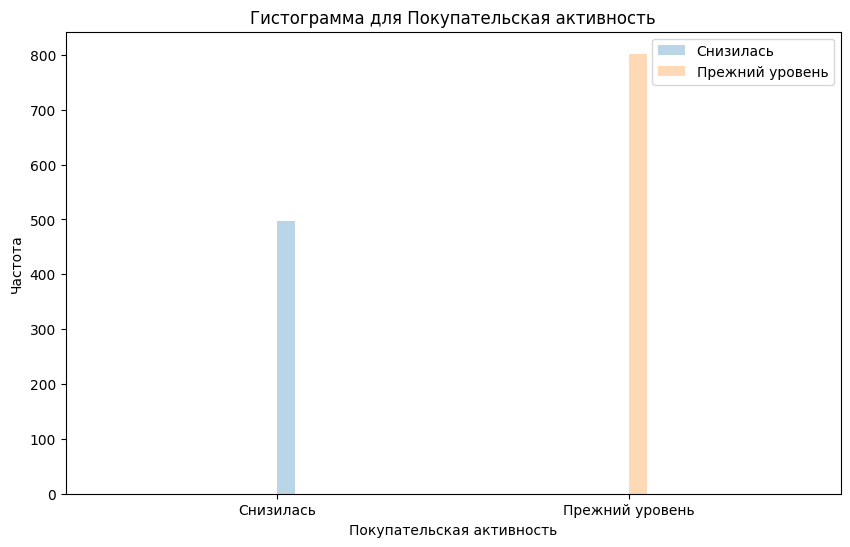

Таблица для Покупательская активность:

Категория: Снизилась


,count,unique,top,freq
Покупательская активность,497,1,Снизилась,497



Категория: Прежний уровень


,count,unique,top,freq
Покупательская активность,802,1,Прежний уровень,802


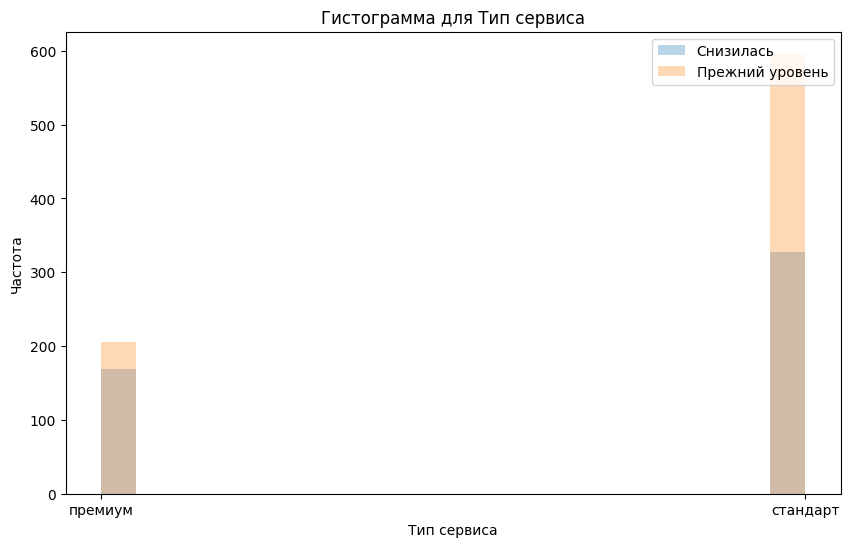

Таблица для Тип сервиса:

Категория: Снизилась


,count,unique,top,freq
Тип сервиса,497,2,стандарт,328



Категория: Прежний уровень


,count,unique,top,freq
Тип сервиса,802,2,стандарт,596


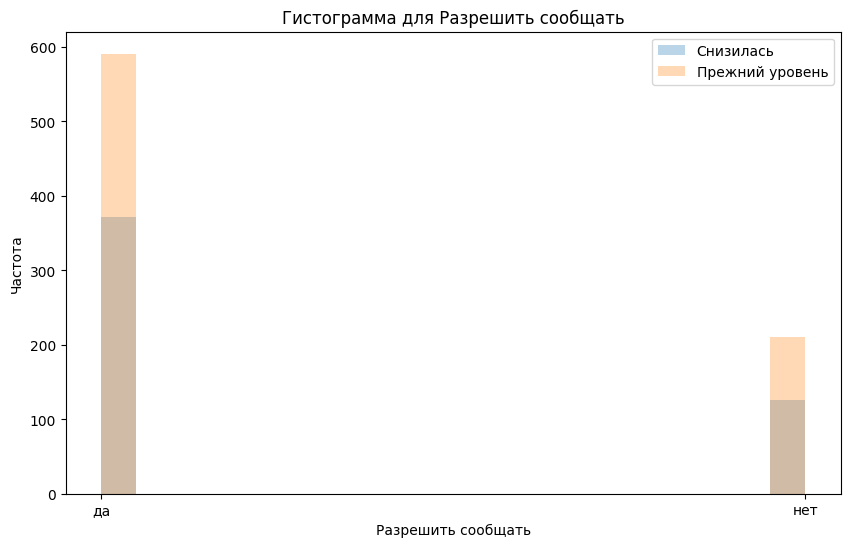

Таблица для Разрешить сообщать:

Категория: Снизилась


,count,unique,top,freq
Разрешить сообщать,497,2,да,371



Категория: Прежний уровень


,count,unique,top,freq
Разрешить сообщать,802,2,да,591


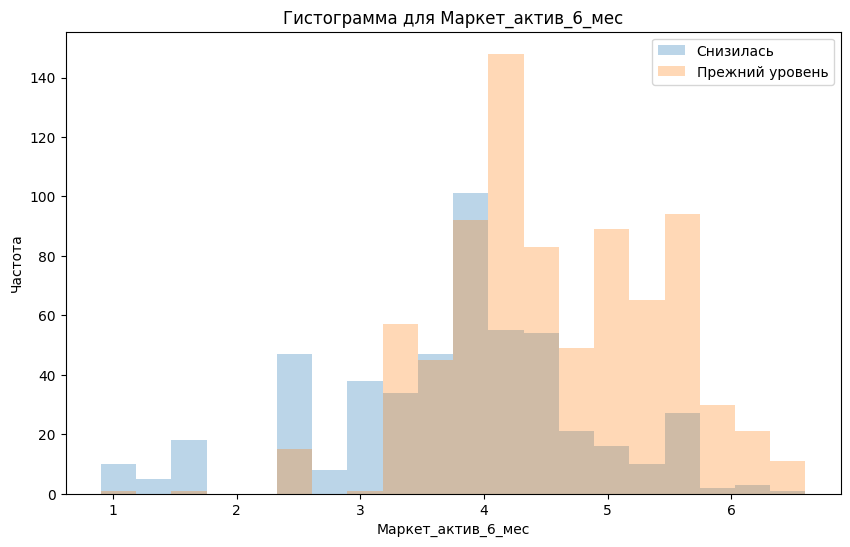

Таблица для Маркет_актив_6_мес:

Категория: Снизилась


,count,mean,std,min,25%,50%,75%,max
Маркет_актив_6_мес,497.0,3.748491,1.050424,0.9,3.1,3.9,4.4,6.6



Категория: Прежний уровень


,count,mean,std,min,25%,50%,75%,max
Маркет_актив_6_мес,802.0,4.570075,0.848618,0.9,4.0,4.4,5.275,6.6


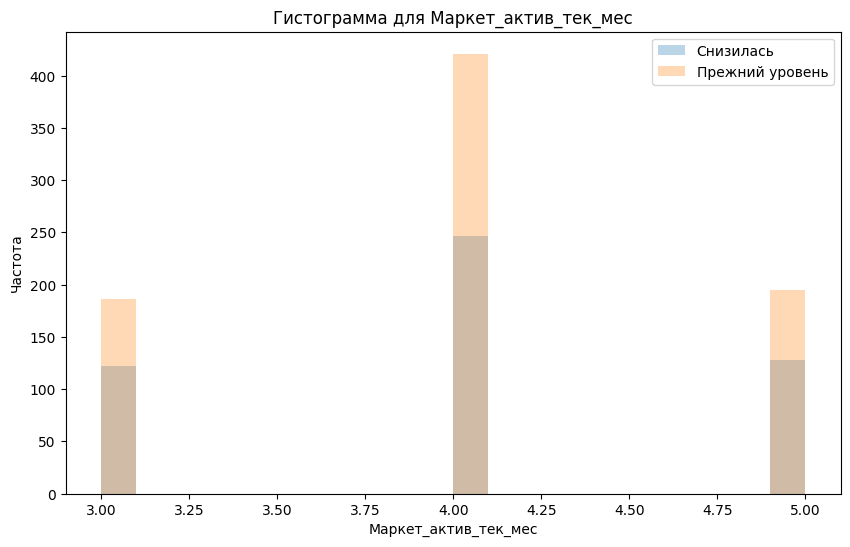

Таблица для Маркет_актив_тек_мес:

Категория: Снизилась


,count,mean,std,min,25%,50%,75%,max
Маркет_актив_тек_мес,497.0,4.012072,0.709849,3.0,4.0,4.0,5.0,5.0



Категория: Прежний уровень


,count,mean,std,min,25%,50%,75%,max
Маркет_актив_тек_мес,802.0,4.011222,0.689586,3.0,4.0,4.0,4.0,5.0


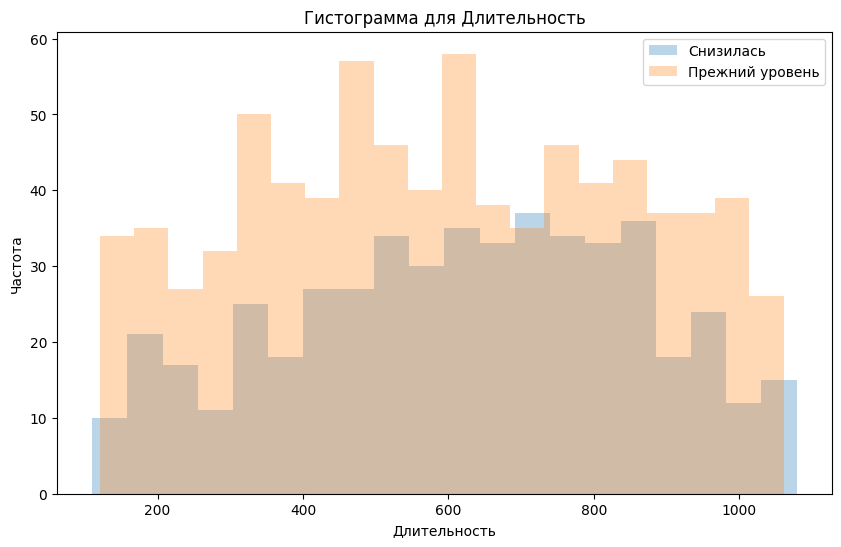

Таблица для Длительность:

Категория: Снизилась


,count,mean,std,min,25%,50%,75%,max
Длительность,497.0,619.849095,240.18134,110.0,449.0,633.0,811.0,1079.0



Категория: Прежний уровень


,count,mean,std,min,25%,50%,75%,max
Длительность,802.0,590.730673,255.330179,121.0,382.5,590.0,798.75,1061.0


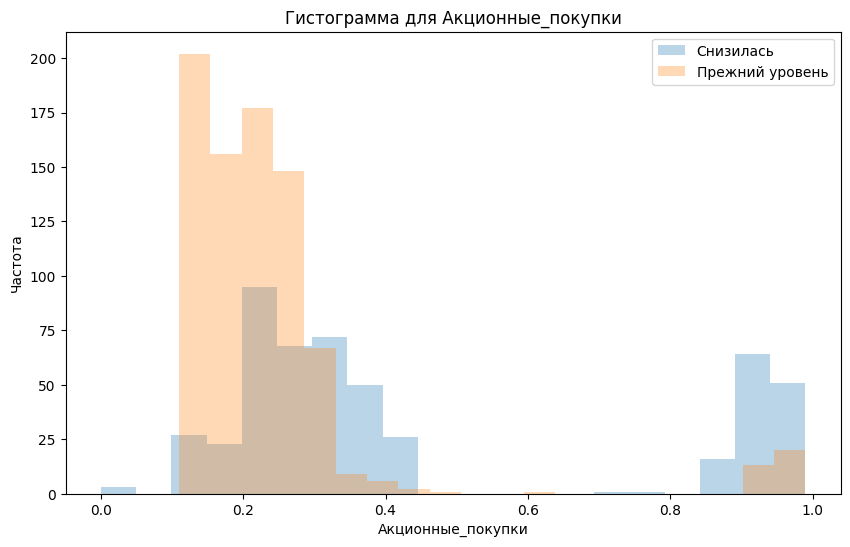

Таблица для Акционные_покупки:

Категория: Снизилась


,count,mean,std,min,25%,50%,75%,max
Акционные_покупки,497.0,0.44998,0.305529,0.0,0.24,0.31,0.89,0.99



Категория: Прежний уровень


,count,mean,std,min,25%,50%,75%,max
Акционные_покупки,802.0,0.238367,0.160599,0.11,0.15,0.21,0.26,0.99


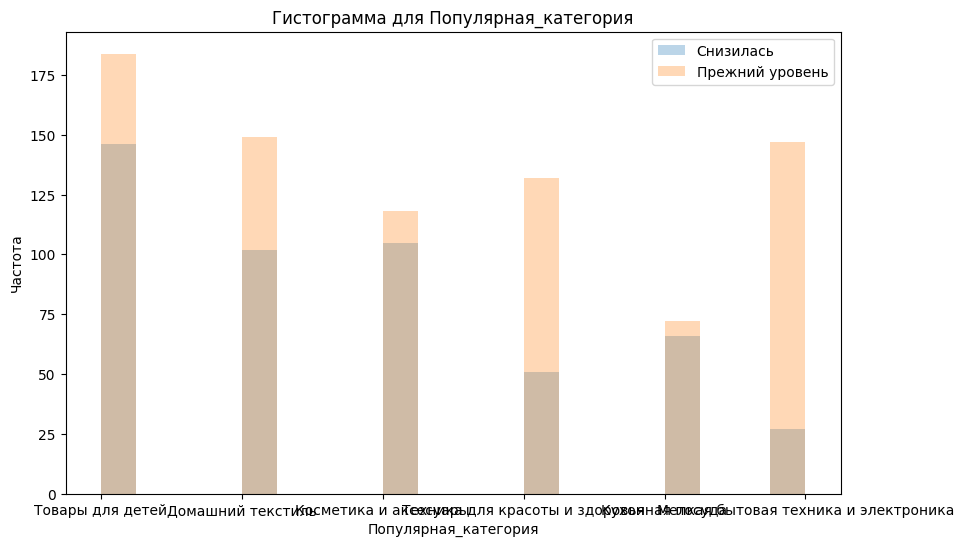

Таблица для Популярная_категория:

Категория: Снизилась


,count,unique,top,freq
Популярная_категория,497,6,Товары для детей,146



Категория: Прежний уровень


,count,unique,top,freq
Популярная_категория,802,6,Товары для детей,184


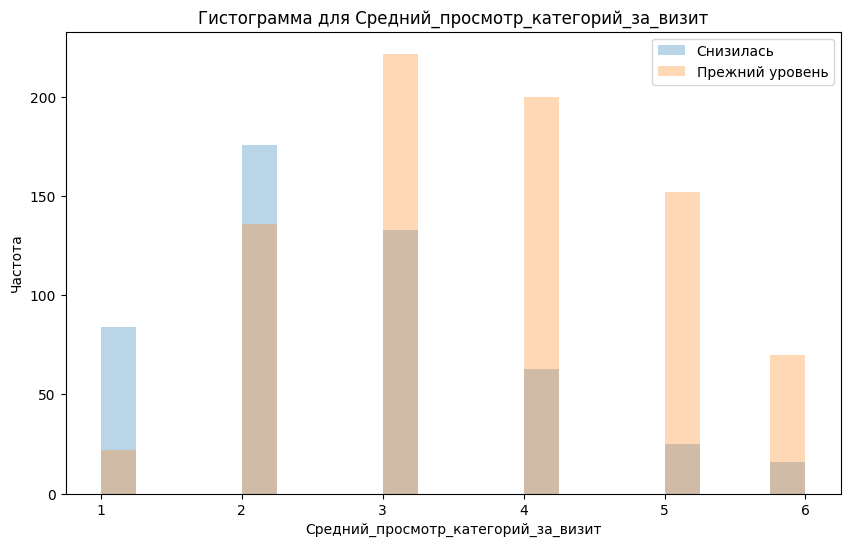

Таблица для Средний_просмотр_категорий_за_визит:

Категория: Снизилась


,count,mean,std,min,25%,50%,75%,max
Средний_просмотр_категорий_за_визит,497.0,2.631791,1.230999,1.0,2.0,2.0,3.0,6.0



Категория: Прежний уровень


,count,mean,std,min,25%,50%,75%,max
Средний_просмотр_категорий_за_визит,802.0,3.665835,1.277112,1.0,3.0,4.0,5.0,6.0


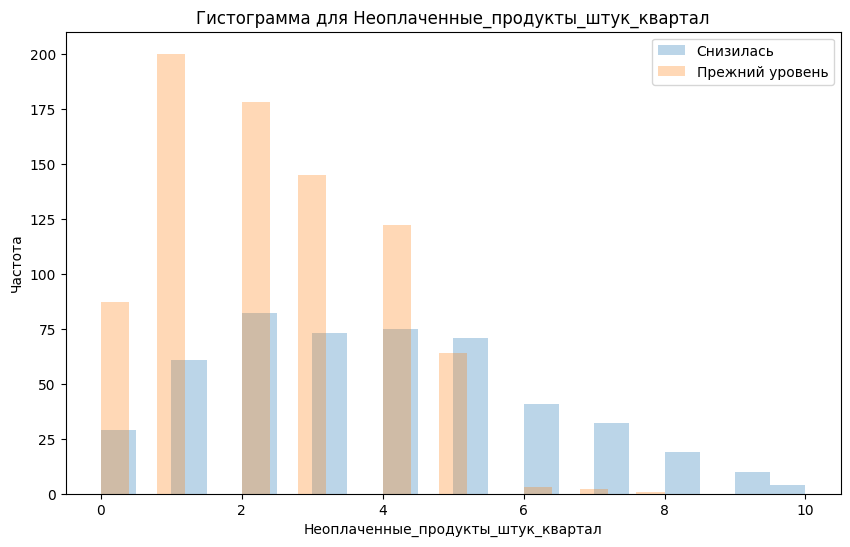

Таблица для Неоплаченные_продукты_штук_квартал:

Категория: Снизилась


,count,mean,std,min,25%,50%,75%,max
Неоплаченные_продукты_штук_квартал,497.0,3.724346,2.28831,0.0,2.0,4.0,5.0,10.0



Категория: Прежний уровень


,count,mean,std,min,25%,50%,75%,max
Неоплаченные_продукты_штук_квартал,802.0,2.293017,1.508255,0.0,1.0,2.0,3.0,8.0


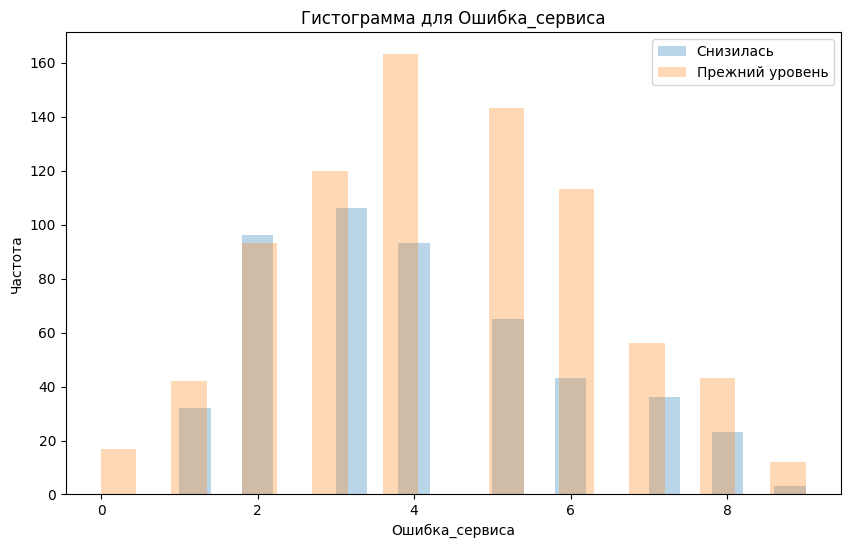

Таблица для Ошибка_сервиса:

Категория: Снизилась


,count,mean,std,min,25%,50%,75%,max
Ошибка_сервиса,497.0,3.943662,1.894614,1.0,2.0,4.0,5.0,9.0



Категория: Прежний уровень


,count,mean,std,min,25%,50%,75%,max
Ошибка_сервиса,802.0,4.335411,1.979538,0.0,3.0,4.0,6.0,9.0


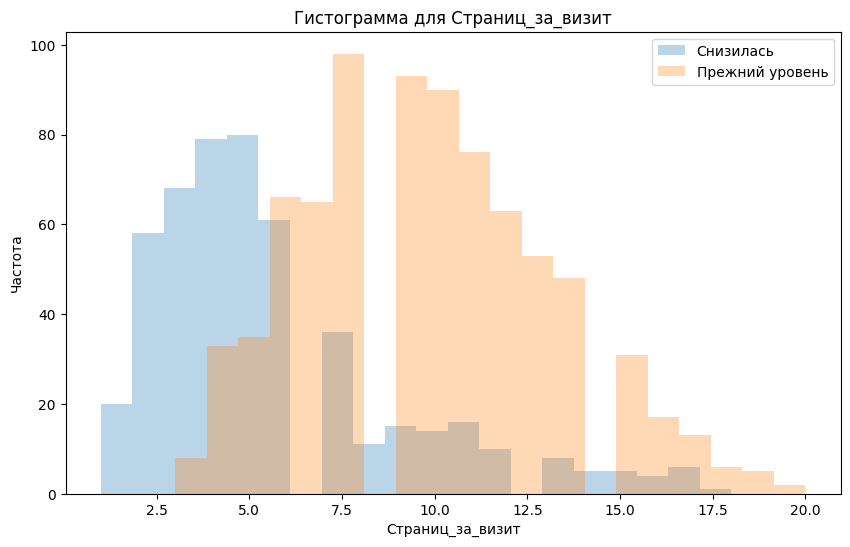

Таблица для Страниц_за_визит:

Категория: Снизилась


,count,mean,std,min,25%,50%,75%,max
Страниц_за_визит,497.0,5.565392,3.457147,1.0,3.0,5.0,7.0,18.0



Категория: Прежний уровень


,count,mean,std,min,25%,50%,75%,max
Страниц_за_визит,802.0,9.796758,3.376846,3.0,7.0,10.0,12.0,20.0


In [17]:
# Определение столбца и категорий для анализа
column = 'Покупательская активность'
categories = ['Снизилась', 'Прежний уровень']

# Получение списка всех столбцов в датафрейме, исключая 'id'
columns = [col for col in market_file.columns if col != 'id']

# Цикл по каждому столбцу для создания гистограммы и таблицы
for col in columns:
    plt.figure(figsize=(10, 6))
    
    # Цикл по каждой категории для создания гистограммы
    for category in categories:
        # Фильтрация данных по текущей категории
        data = market_file[market_file[column] == category]
        # Создание гистограммы для текущей категории
        plt.hist(data[col].dropna(), bins=20, alpha=0.3, label=category)
    
    # Настройка и отображение гистограммы
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.legend(loc='upper right')
    plt.show()
    
    # Вывод таблицы для каждого столбца
    print(f'Таблица для {col}:')
    for category in categories:
        # Фильтрация данных по текущей категории
        data = market_file[market_file[column] == category]
        print(f'\nКатегория: {category}')
        # Создание и вывод таблицы с описательной статистикой для текущей категории
        display(data[col].describe().to_frame().T)

Наблюдения:

1. **Покупательская активность**: В категории "Снизилась" 497 наблюдений, а в категории "Прежний уровень" - 802 наблюдения.

2. **Тип сервиса**: В обеих категориях большинство клиентов выбирают "стандарт".

3. **Разрешить сообщать**: Большинство клиентов в обеих категориях разрешили отправку сообщений.

4. **Маркет_актив_6_мес**: Средняя активность на рынке за последние 6 месяцев выше у клиентов, чья активность осталась на прежнем уровне.

5. **Маркет_актив_тек_мес**: Средняя активность на рынке в текущем месяце примерно одинакова в обеих категориях.

6. **Длительность**: Клиенты, чья активность снизилась, в среднем проводят больше времени.

7. **Акционные_покупки**: Клиенты, чья активность снизилась, в среднем совершают больше акционных покупок.

8. **Популярная_категория**: В обеих категориях наиболее популярной является категория "Товары для детей".

9. **Средний_просмотр_категорий_за_визит**: Клиенты, чья активность осталась на прежнем уровне, в среднем просматривают больше категорий за визит.

10. **Неоплаченные_продукты_штук_квартал**: Клиенты, чья активность снизилась, в среднем имеют больше неоплаченных продуктов за квартал.

11. **Ошибка_сервиса**: Клиенты, чья активность осталась на прежнем уровне, в среднем сталкиваются с большим количеством ошибок сервиса.

12. **Страниц_за_визит**: Клиенты, чья активность осталась на прежнем уровне, в среднем просматривают больше страниц за визит.




**Общий вывод по исследовательскому анализу данных:**

В ходе анализа было выявлено, что все клиенты активно взаимодействовали и приносили доход в течение последних трех месяцев. 

**Статистический обзор** показал следующее:
- **Market File**: Среднее значение для 'Маркет_актив6мес' - 4.25, 'Маркет_актив_тек_мес' - 4.01, 'Длительность' - 601.9.
- **Market Money**: Среднее значение для 'Выручка' - 5025.7.
- **Market Time**: Среднее значение для 'минут' - 13.34.
- **Money**: Среднее значение для 'Прибыль' - 3.99.

**Наблюдения** показали, что большинство клиентов выбирают стандартный тип сервиса, разрешили отправку сообщений и предпочитают категорию "Товары для детей". 

Клиенты, чья активность снизилась, в среднем проводят больше времени на сайте и совершают больше акционных покупок. Это может быть связано с тем, что они ищут лучшие предложения или скидки, что в свою очередь может указывать на их чувствительность к ценам. Если это верно, то предложение специальных акций или скидок этой группе клиентов может помочь увеличить их активность и выручку.

# Шаг 4. Объединение таблиц

In [18]:
# преобразование данных
market_money = market_money.pivot(index='id', columns='Период', values='Выручка')
market_money.columns = ['выручка_' + str(col) for col in market_money.columns]

# упорядочивание столбцов
market_money = market_money[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']]

# фильтрация данных
market_money = market_money[(market_money['выручка_препредыдущий_месяц'] != 0) & (market_money['выручка_предыдущий_месяц'] != 0) & (market_money['выручка_текущий_месяц'] != 0)]

display(market_money)


,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц
id,,,
215349,4472.0,5216.0,4971.6
215350,4826.0,5457.5,5058.4
215351,4793.0,6158.0,6610.4
215352,4594.0,5807.5,5872.5
215353,5124.0,4738.5,5388.5
...,...,...,...
216643,4704.0,3664.0,4741.7
216644,5299.0,4729.0,5353.0
216645,5334.0,5160.0,5139.2


In [19]:
# преобразование данных
market_time = market_time.pivot(index='id', columns='Период', values='минут')
market_time.columns = ['минут_' + str(col) for col in market_time.columns]

display(market_time)

,минут_предыдущий_месяц,минут_текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [20]:
# объединение данных
market_file = market_file.merge(market_money, on='id', how='inner')
market_file = market_file.merge(market_time, on='id', how='inner')


In [21]:
display(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4704.0,3664.0,4741.7,14,7
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,5299.0,4729.0,5353.0,12,11
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5334.0,5160.0,5139.2,12,18
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4725.0,4923.0,5224.6,18,7


In [22]:
# Проверка на пропущенные значения
print("Пропущенные значения в данных Market File:")
display(market_file.isnull().sum())
# Проверка на дубликаты
print("\nДубликаты в данных Market File:")
display(market_file.duplicated().sum())
print("Общая информация о данных Market File:")
market_file.info()

Пропущенные значения в данных Market File:


id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
выручка_препредыдущий_месяц            0
выручка_предыдущий_месяц               0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64


Дубликаты в данных Market File:


0

Общая информация о данных Market File:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int6

В целом, мы успешно выполнили задачу объеденения и проверки данных, что позволит нам провести более глубокий и точный анализ в будущем.

# Шаг 5. Корреляционный анализ

interval columns not set, guessing: ['id', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


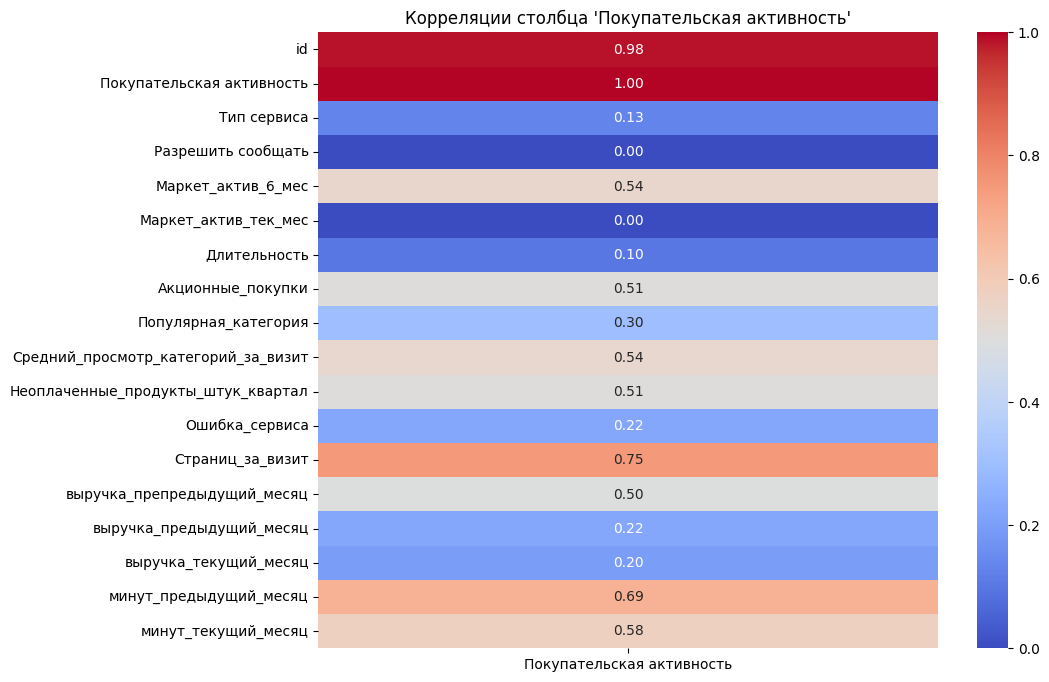

In [23]:
phik_matrix = market_file.phik_matrix()# Визуализация корреляций столбца "Покупательская активность"
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix[["Покупательская активность"]], annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляции столбца 'Покупательская активность'")
plt.show()



Ваш вывод должен быть таким:

- **Покупательская активность** - это целевая переменная, которую мы хотим прогнозировать на основе других признаков.
- Столбец **id** имеет очень высокую корреляцию с покупательской активностью, но это не значит, что он имеет причинно-следственную связь с ней. Скорее всего, это просто случайное совпадение, и этот столбец можно исключить из анализа.
- Столбцы **Маркет_актив_6_мес**, **Акционные_покупки**, **Средний_просмотр_категорий_за_визит**, **Неоплаченные_продукты_штук_квартал** и **Страниц_за_визит** имеют умеренную положительную корреляцию с покупательской активностью, что может указывать на то, что эти признаки влияют на поведение клиентов и их склонность к покупкам.
- Столбцы **Тип сервиса**, **Длительность**, **Популярная_категория**, **Ошибка_сервиса**, **выручка_препредыдущий_месяц**, **выручка_предыдущий_месяц**, **выручка_текущий_месяц**, **общая_выручка**, **минут_предыдущий_месяц**, **минут_текущий_месяц** и **общее_время_на_сайте** имеют слабую положительную корреляцию с покупательской активностью, что может означать, что эти признаки не имеют сильного влияния на решение клиентов о покупке или что их влияние зависит от других факторов.
- Столбцы **Разрешить сообщать** и **Маркет_актив_тек_мес** имеют нулевую корреляцию с покупательской активностью, что может свидетельствовать о том, что эти признаки не имеют никакого отношения к поведению клиентов и их покупательской активности.

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


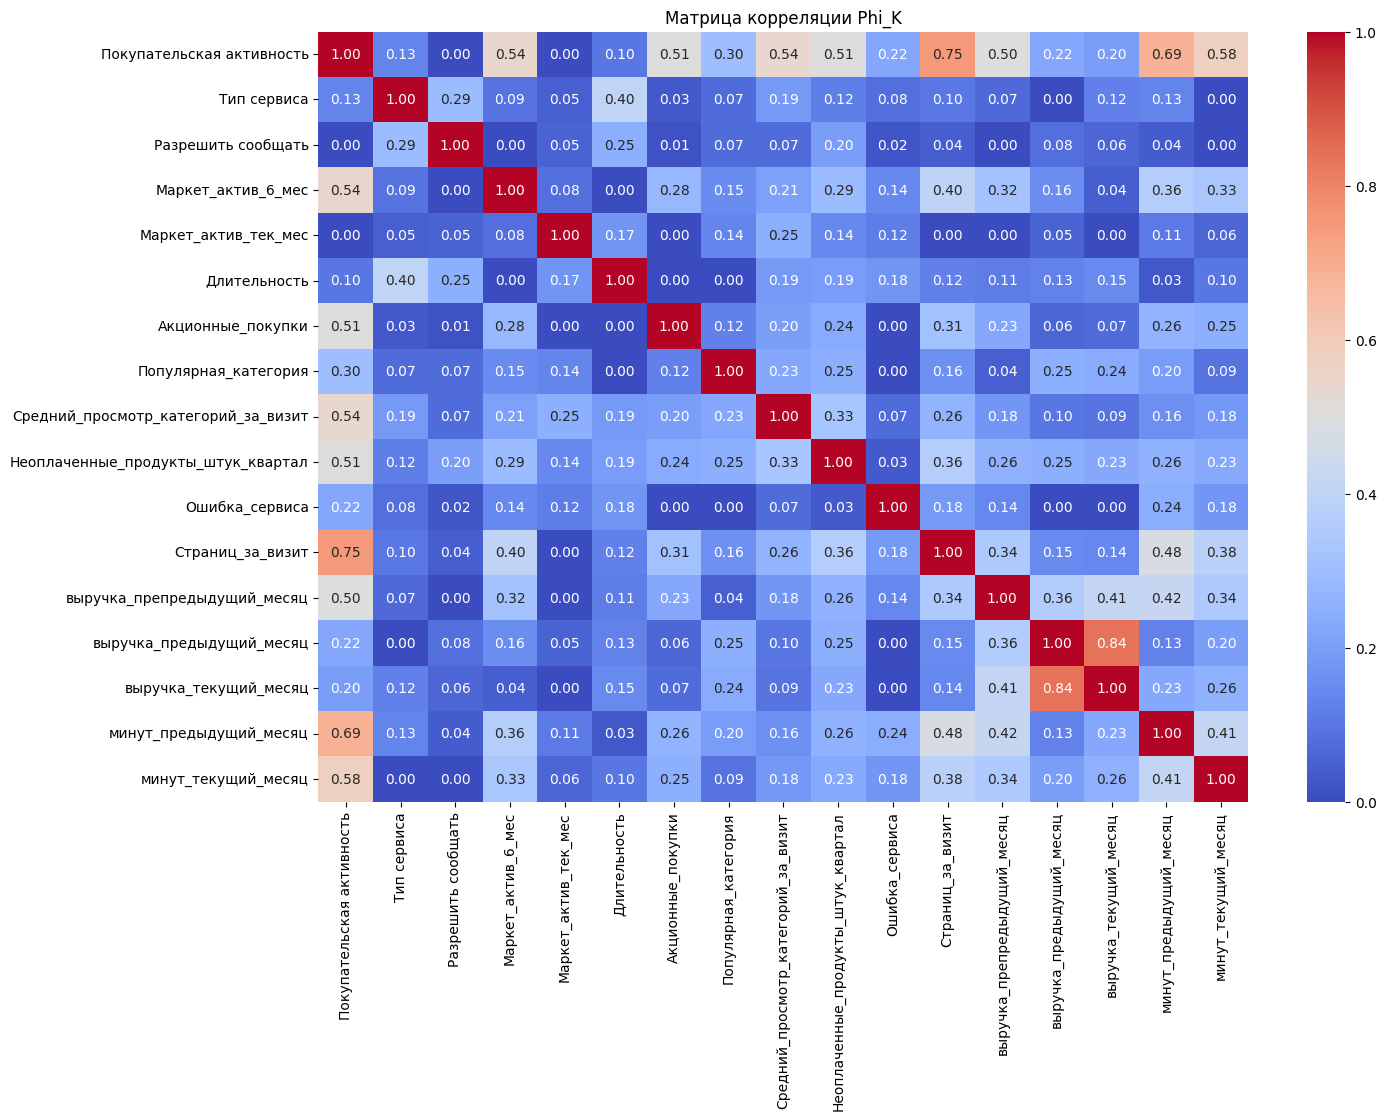

In [24]:
# Удаление столбца 'id'
data_without_id = market_file.drop('id', axis=1)

# Вычисление матрицы корреляции Phi_K для данных без 'id'
phik_matrix = data_without_id.phik_matrix()

# Визуализация матрицы корреляции Phi_K
plt.figure(figsize=(15, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции Phi_K")
plt.show()


На основании представленных данных, провел анализ корреляции между различными признаками и покупательской активностью:

1. **Страниц за визит** ($0.751142$), **Средний просмотр категорий за визит** ($0.535809$), и **Маркет актив 6 мес** ($0.544101$) имеют сильную положительную корреляцию с покупательской активностью. Это означает, что эти признаки могут быть хорошими предикторами покупательской активности.

2. **Акционные покупки** и **выручка препредыдущий месяц** имеют очень высокую корреляцию ($0.747877$). Это может указывать на мультиколлинеарность, что может привести к проблемам в некоторых статистических анализах. Возможно, стоит рассмотреть возможность исключения одного из этих признаков из модели.

3. **выручка предыдущий месяц** и **выручка текущий месяц** также имеют высокую корреляцию ($0.699203$), что может указывать на возможность создания нового признака, который учитывает изменение выручки от месяца к месяцу.

4. Некоторые признаки, такие как **Тип сервиса** и **Разрешить сообщать**, имеют низкую корреляцию с покупательской активностью. Это может указывать на то, что эти признаки могут не оказывать значительного влияния на покупательскую активность.

5. Некоторые признаки, такие как **Маркет актив тек мес** и **Ошибка сервиса**, имеют нулевую корреляцию с покупательской активностью. Это может указывать на то, что эти признаки не влияют на покупательскую активность.

Однако корреляция не гарантирует причинно-следственную связь, и дополнительный анализ может быть необходим для определения важности этих признаков



# Шаг 6. Использование пайплайнов

In [25]:
df_mod = market_file.drop('id', axis=1)

In [26]:
# Заменяем значения в столбце Покупательская активность
df_mod['Покупательская активность'] = df_mod['Покупательская активность'].replace({'Снизилась': 1, 'Прежний уровень': 0})

C:\Users\ivano\AppData\Local\Temp\ipykernel_25000\377668049.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mod['Покупательская активность'] = df_mod['Покупательская активность'].replace({'Снизилась': 1, 'Прежний уровень': 0})


In [27]:
# Задаем параметры для разделения данных
RANDOM_STATE = 13
TEST_SIZE = 0.20

# Определение целевого признака
target = 'Покупательская активность'

# Получение списка всех признаков, за исключением целевого
features = df_mod.columns.drop(target)

# Определение числовых и текстовых признаков
num_columns = df_mod[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
ohe_columns = df_mod[features].select_dtypes(include=['object']).columns.tolist()


# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    df_mod.drop(target, axis=1), # Независимые переменные
    df_mod[target], # Зависимая переменная
    test_size=TEST_SIZE, # Размер тестовой выборки
    random_state=RANDOM_STATE # Случайное состояние для воспроизводимости
)


ohe_pipe = Pipeline(
    [('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)


pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

# создаем список словарей для каждой модели
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(2,10),
        'model__max_features': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),  'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier()     
    {
        'model': [KNeighborsClassifier()],        
        'model__n_neighbors': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),'passthrough']    
    },
# словарь для модели LogisticRegression()    
    {
        'model': [LogisticRegression(solver='liblinear', penalty='l1', random_state=RANDOM_STATE)],
        'model__C': range(1,5),        
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),'passthrough']  
    },

    # словарь для модели SVC()
    {
        'model': [SVC(probability=True, random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), 'passthrough']
}
]

grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)
y_test_pred = grid.predict(X_test)
roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc:.4f}')
# Предсказание вероятностей классов
probabilities = grid.predict_proba(X_test)

# Извлечение вероятностей для класса 1
probabilities_one = probabilities[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, probabilities_one)

print(f'Метрика ROC-AUC для класса 1 на тестовой выборке: {roc_auc:.4f}')


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('num', MinMaxScaler(),
                                                  ['Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                                   'Длительность',
                                       

В результате выполнения кода, была выбрана лучшая модель и её параметры. Лучшей моделью оказалась LogisticRegression(C=1, penalty='l1', random_state=13, solver='liblinear')
Эта модель была обучена на данных, предварительно обработанных с помощью OneHotEncoder для категориальных признаков и MinMaxScaler для числовых признаков. 

Метрика лучшей модели на тренировочной выборке (0.8998): Это показывает, что модель хорошо обучилась на тренировочных данных и смогла уловить большую часть закономерностей в данных.

Метрика ROC-AUC на тестовой выборке (0.8999): Это значение немного ниже, чем на тренировочной выборке, что говорит о том, что модель хорошо обобщает на новых данных, даже чуть ЛУЧШЕ, чем на тренировочных данных.

Метрика ROC-AUC вероятностей для класса 1 на тестовой выборке (0.9123): Это значение выше, чем просто метрика ROC-AUC на тестовой выборке, что говорит о том, что модель еще лучше работает, когда она оценивает вероятности классов, а не просто предсказывает метки классов. 

Таким образом, выбранная модель показала хорошие результаты и может быть использована для прогнозирования покупательской активности на основе предоставленных данных. 



# Шаг 7. Анализ важности признаков

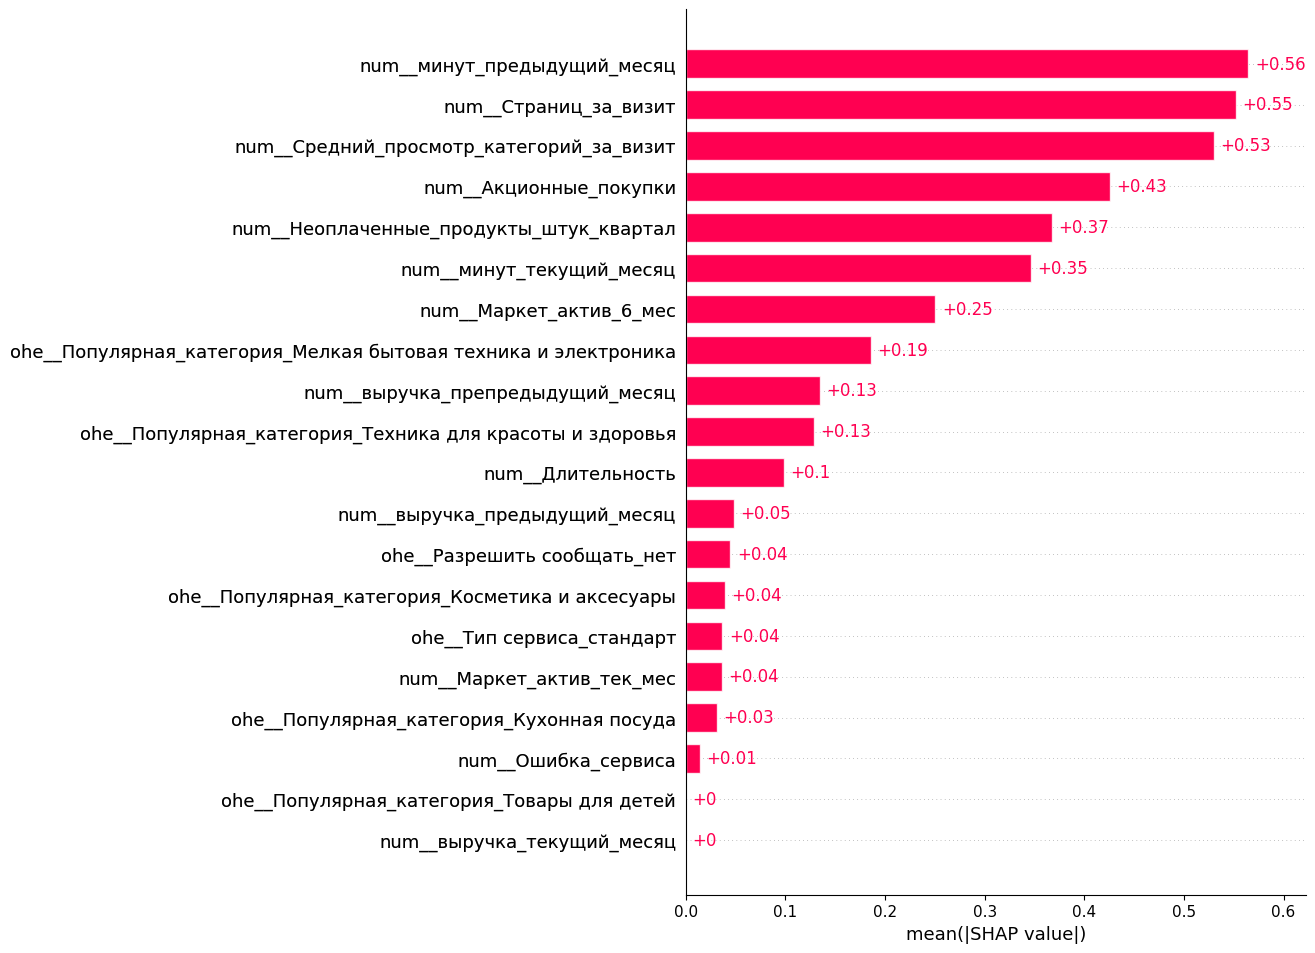

None

In [28]:
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)


explainer = shap.Explainer(grid.best_estimator_.named_steps['model'], X_train_2)

X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
 
 
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)
 
shap_values = explainer(X_test_2)
 
display(shap.plots.bar(shap_values, max_display=30))



Вывод: Признаки, такие как “num_минут_предыдущий_месяц”, “num_Страниц_за_визит” и “num_Средний просмотр категории за визит”, являются наиболее значимыми, так как они имеют наибольшее влияние на покупательскую активность.

Однако признаки, такие как “ohe_Популярная категория Товары для детей” и ”num выручка текущий месяц”, не имеют  влияние и могут быть менее важными для модели.

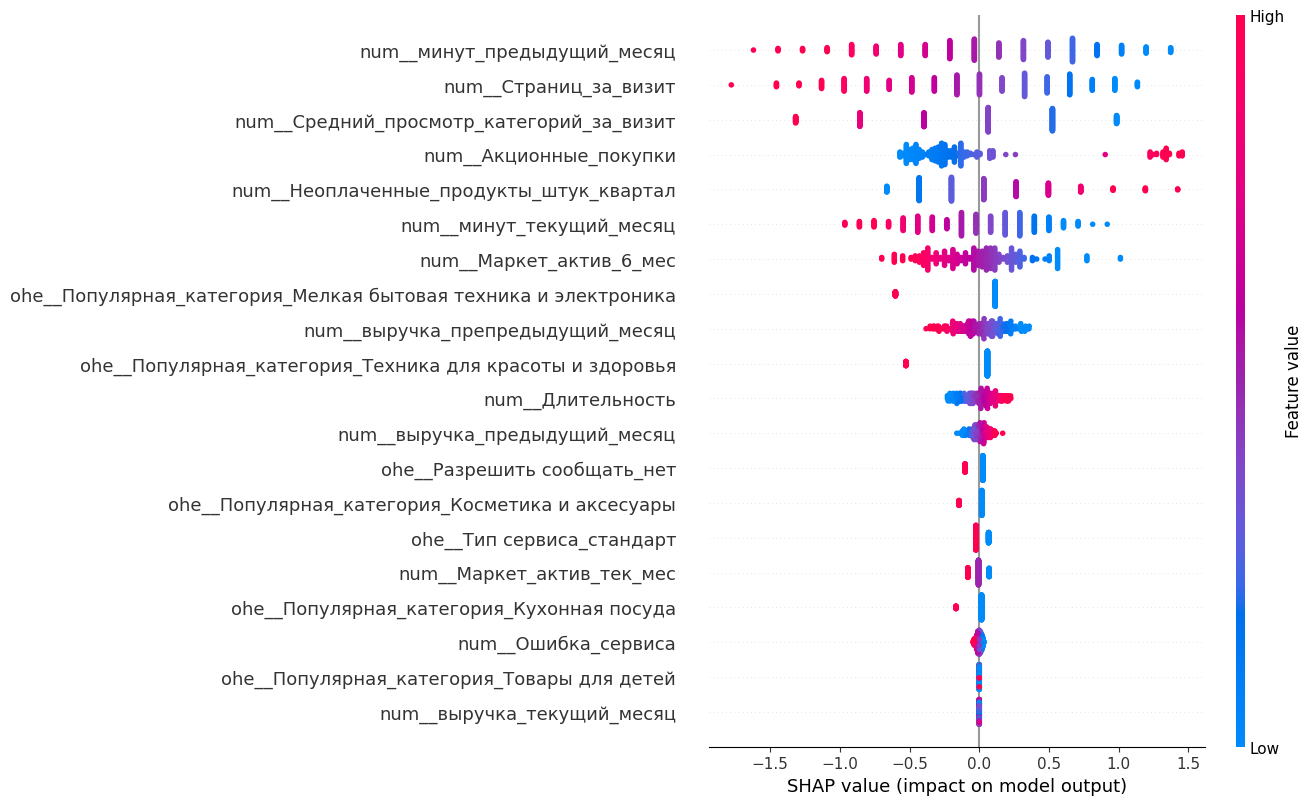

In [29]:
shap.plots.beeswarm(shap_values, max_display=300) 
 

На диаграмме размаха показана важность разных признаков для модели, которая предсказывает покупательскую активность. Признаки с положительными значениями SHAP повышают вероятность того, что покупательская активность снизится (класс 1), а признаки с отрицательными значениями - понижают (класс 0).

Самые влиятельные признаки, которые способствуют покупательской активности, это:

- **"num_минут_предыдущий_месяц"**: Этот признак отражает, сколько времени покупатель проводил на сайте в минутах. Он имеет большое отрицательное значение SHAP, что означает, что чем больше этот признак, тем меньше шансов, что покупательская активность снизится.

- **"num_Страницы_за_визит"**: Этот признак измеряет, сколько страниц покупатель просматривал за один визит на сайт в среднем за последние 3 месяца. Он также имеет большое отрицательное значение SHAP, что говорит о том, что чем больше этот признак, тем выше покупательская активность.

- **"num_Средний_просмотр_категории_за_визит"**: Этот признак показывает, сколько категорий товаров покупатель смотрел за визит в среднем за последний месяц. Он имеет отрицательное значение SHAP, но меньше, чем у предыдущих двух признаков.

- **"num_Акционные покупки"**: Этот признак вычисляет, какая доля покупок покупателя была по акции в среднем за последние 6 месяцев. Он имеет положительное значение SHAP, что значит, что чем больше этот признак, тем больше вероятность снижения покупательской активности.

- **"num_Неоплаченые продукты штука квартал"**: Этот признак считает, сколько товаров покупатель оставлял в корзине без оплаты за последние 3 месяца. Он также имеет положительное значение SHAP, что свидетельствует о том, что чем больше этот признак, тем ниже покупательская активность.

- **"num_минут текущий месяц"**: Этот признак отображает, сколько времени покупатель проводил на сайте в минутах. Он имеет небольшое отрицательное значение SHAP, что указывает на то, что чем больше этот признак, тем выше покупательская активность.

- **"num_Маркет актив 6 мес"**: Этот признак определяет, сколько маркетинговых акций компании достигало покупателя в среднем за последние 6 месяцев. Это число включает в себя рассылки, звонки, рекламу и т.д. Он имеет отрицательное значение SHAP, что означает, что чем больше этот признак, тем выше покупательская активность.

- **"one_Популярная категория Мелкая бытовая техника и электроника"**: Этот признак показывает, какая категория товаров была самой популярной у покупателя за последние 6 месяцев. Он имеет небольшое отрицательное значение SHAP, что значит, что чем больше этот признак, тем выше покупательская активность.

- **num_выручка препредыдущий месяц**: Этот признак измеряет, сколько денег покупатель потратил на сайте за предпредыдущий месяц. Он имеет небольшое отрицательное значение SHAP, что означает, что чем больше этот признак, тем выше покупательская активность.

В общем, все эти признаки имеют значение для предсказания покупательской активности, но их влияние разное. Признаки с большими положительными значениями SHAP сильнее всего влияют на снижение покупательской активности, а признаки с отрицательными значениями SHAP - на сохранение покупательской активности. При разработке стратегий по работе с клиентами нужно учитывать все эти признаки.

Эти наблюдения могут помочь вам понять, какие факторы влияют на покупательскую активность ваших клиентов, и как вы можете улучшить свою стратегию продаж. Например, вы можете:

- Стимулировать клиентов, которые проводят много времени на сайте и просматривают много страниц и категорий, скидками, бонусами или персонализированными рекомендациями.
- Предлагать клиентам, которые делают много акционных покупок, альтернативные товары с более высокой маржой или увеличивать цену на акционные товары.
- Снижать количество неоплаченных товаров в корзине, например, отправляя напоминания, предлагая бесплатную доставку или гарантию возврата.
- Увеличивать количество маркетинговых коммуникаций с клиентами, которые редко посещают сайт или мало тратят, чтобы повысить их лояльность и интерес к вашим товарам.
- Анализировать, какие категории товаров наиболее популярны у ваших клиентов, и оптимизировать ассортимент, ценообразование и продвижение этих категорий.


# Шаг 8. Сегментация покупателей

Будем изучать сегмент "Пассивные скидочники", может быть определен следующим образом:

- **"num_минут_предыдущий_месяц"**: Покупатели в этой группе проводят меньше времени на сайте, чем другие. Это может быть связано с тем, что они редко ищут товары, не связанные со скидками.

- **"num_Страницы_за_визит"**: Они просматривают меньше страниц за визит, что указывает на их фокусировку на конкретных товарах или категориях, скорее всего, со скидками.

- **"num_Средний_просмотр_категории_за_визит"**: Они просматривают меньше категорий товаров за визит, что также указывает на их узкую фокусировку на определенных товарах или категориях.

- **"num_Акционные покупки"**: Большая часть их покупок совершается по акции, что подтверждает их стремление к экономии.

- **"num_Неоплаченые продукты штука квартал"**: Они часто оставляют товары в корзине без оплаты, возможно, ожидая снижения цены.

Эти покупатели могут быть ценными для бизнеса, поскольку они могут быть мотивированы к покупке при предложении скидок или акций. Однако важно учесть, что их покупательская активность может быть ниже, чем у других групп покупателей. Это может потребовать специальных маркетинговых стратегий для стимулирования их активности.

In [30]:
# объединение данных
market_file = market_file.merge(money, on='id', how='left')

In [31]:
market_file.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

In [32]:
# Определение сегмента "Пассивные скидочники"
passive_discounters = market_file[
    (market_file['минут_предыдущий_месяц'] < market_file['минут_предыдущий_месяц'].mean()) &
    (market_file['Страниц_за_визит'] < market_file['Страниц_за_визит'].mean()) &
    (market_file['Средний_просмотр_категорий_за_визит'] < market_file['Средний_просмотр_категорий_за_визит'].mean()) &
    (market_file['Акционные_покупки'] > market_file['Акционные_покупки'].mean()) &
    (market_file['Неоплаченные_продукты_штук_квартал'] > market_file['Неоплаченные_продукты_штук_квартал'].mean())
]

print(f'Создан сегмент "Пассивные скидочники" с {len(passive_discounters)} покупателями.')


Создан сегмент "Пассивные скидочники" с 119 покупателями.


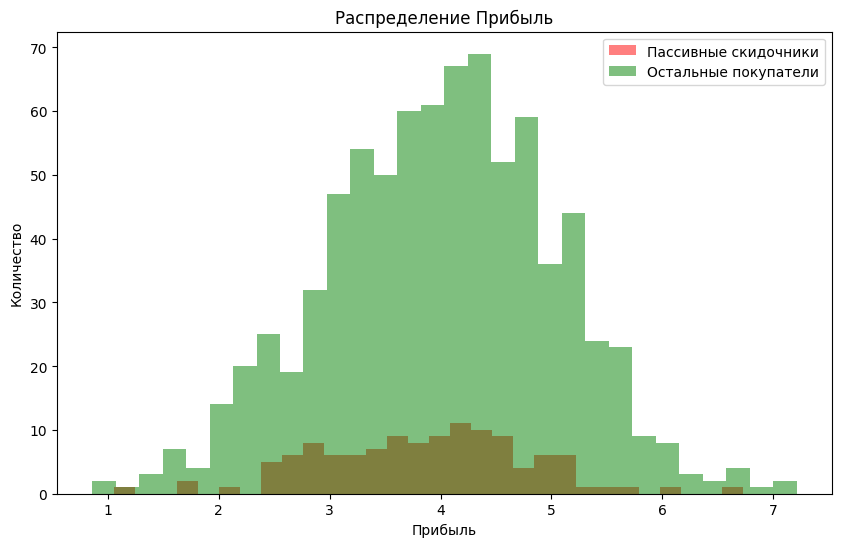

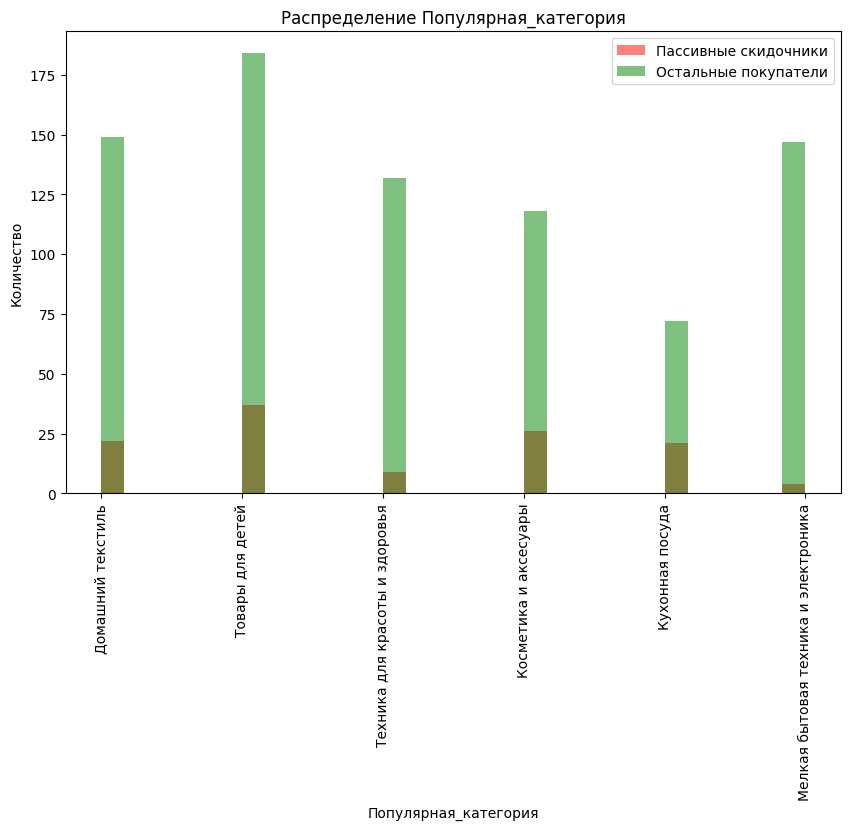

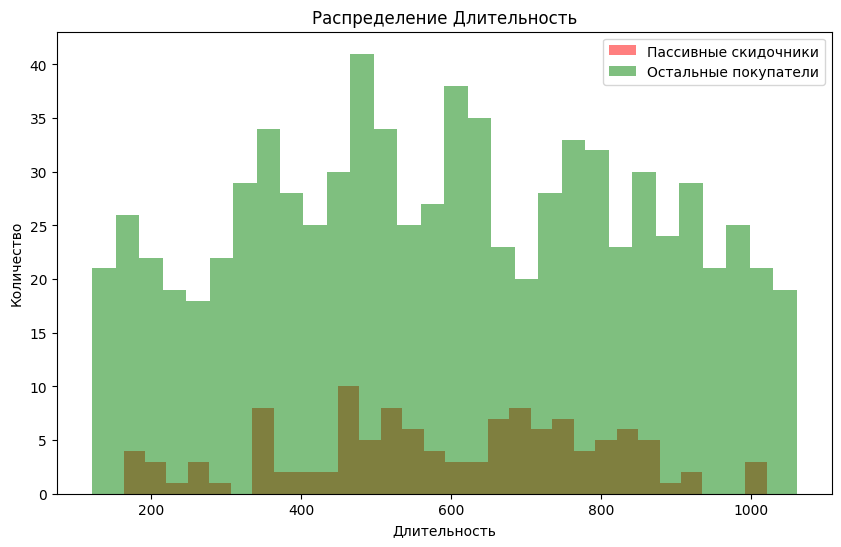

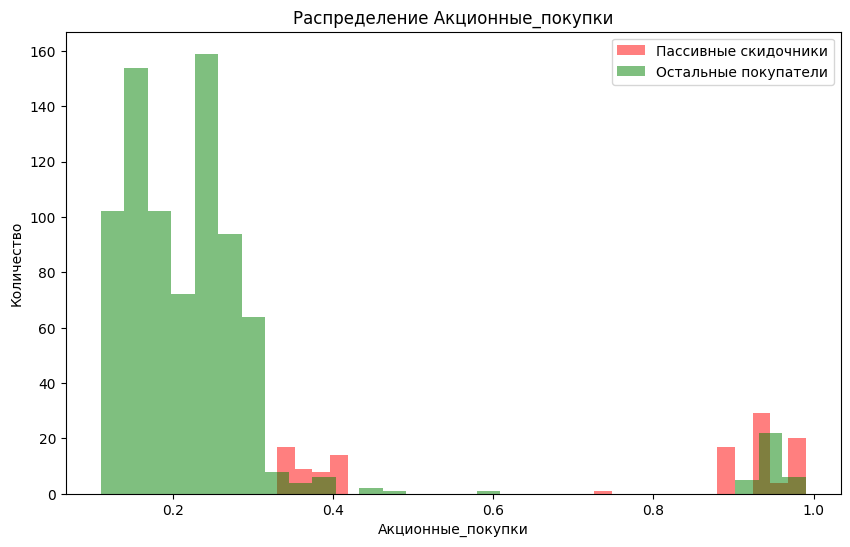

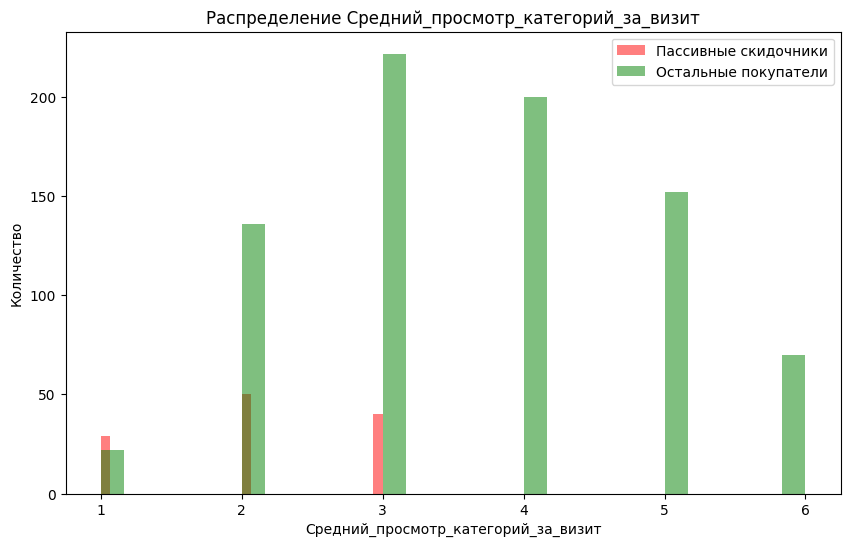

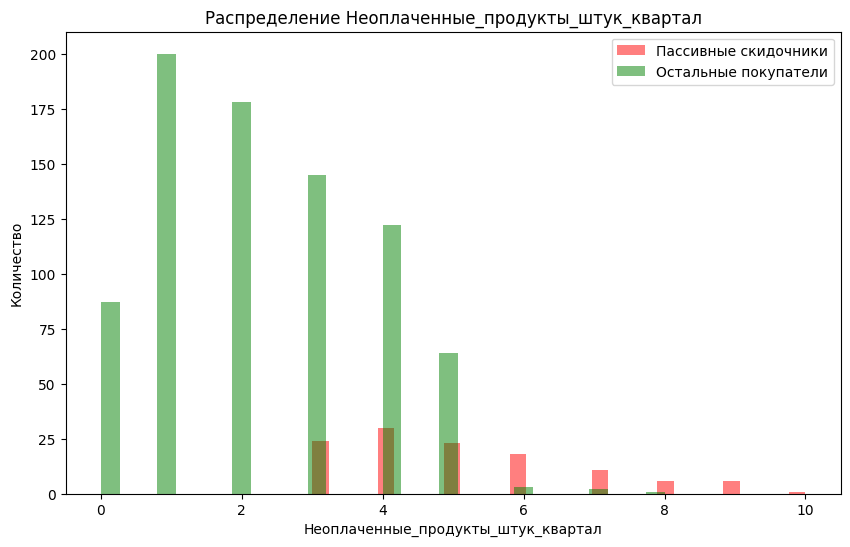

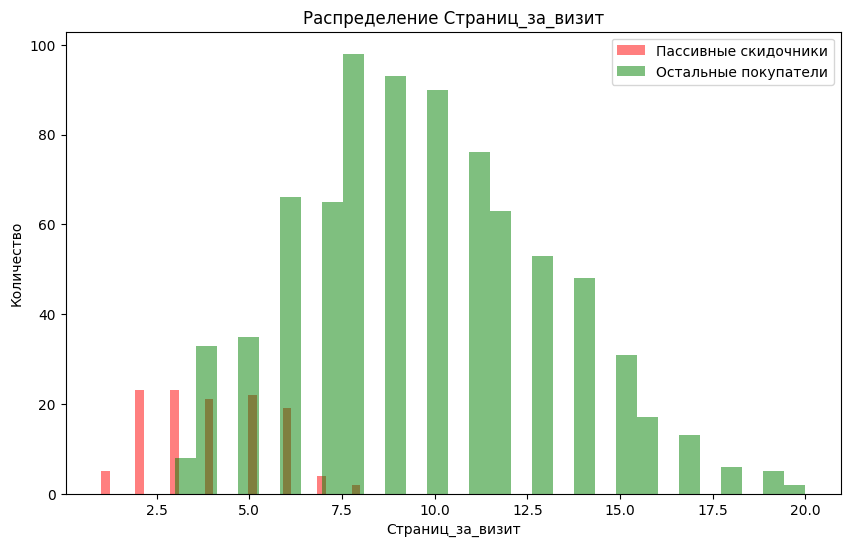

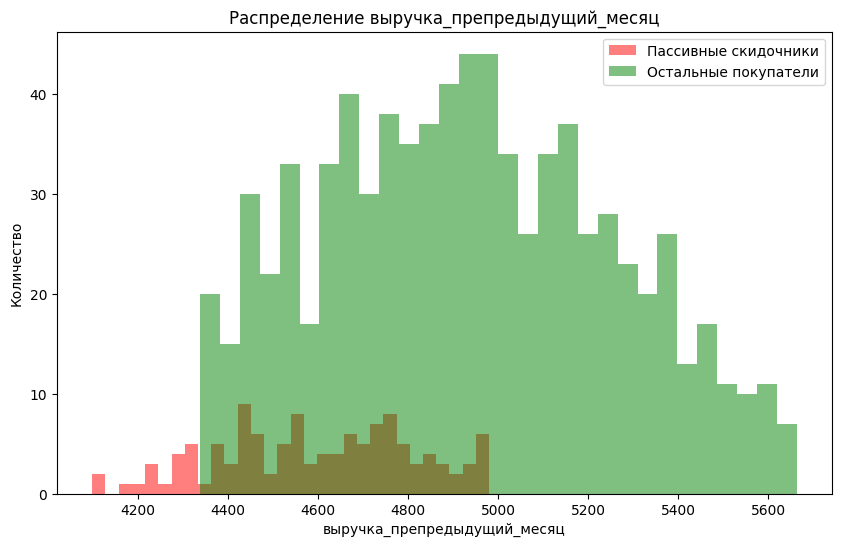

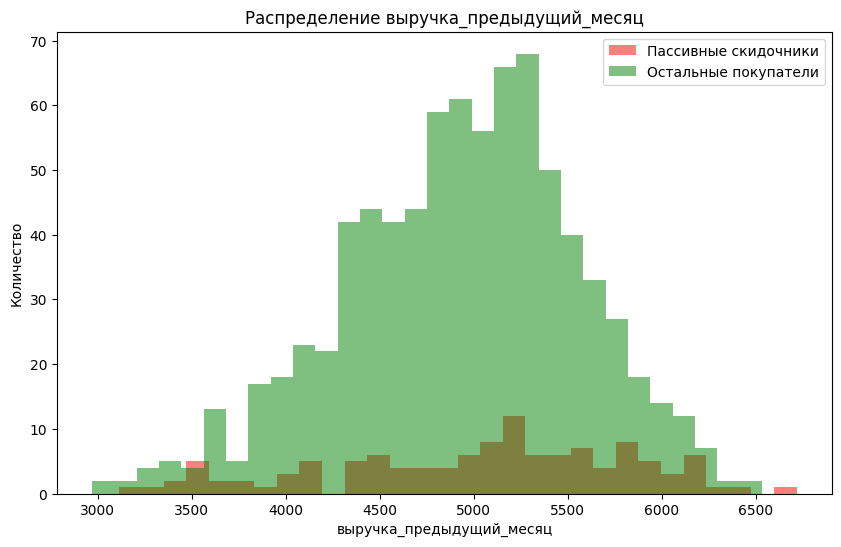

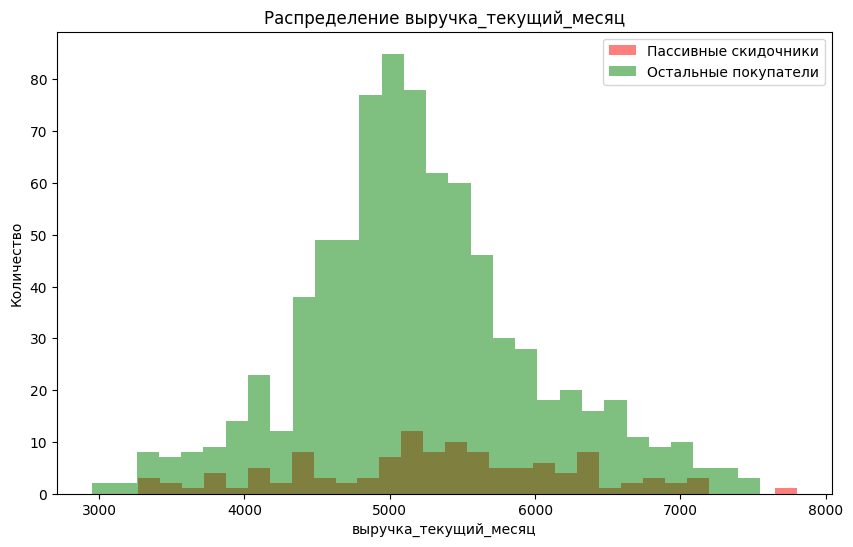

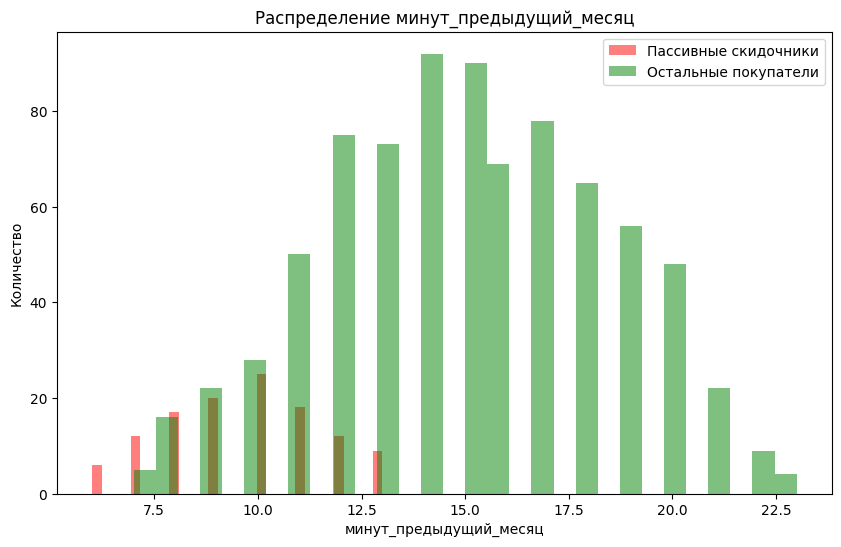

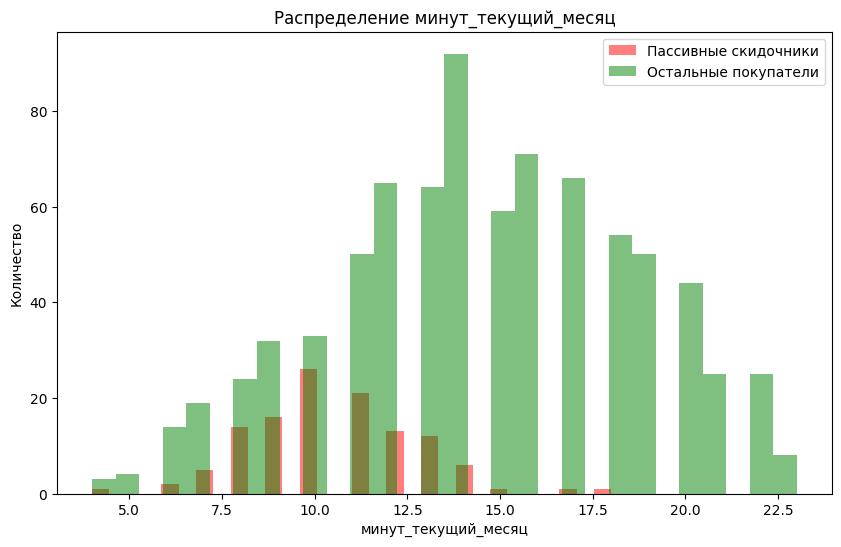

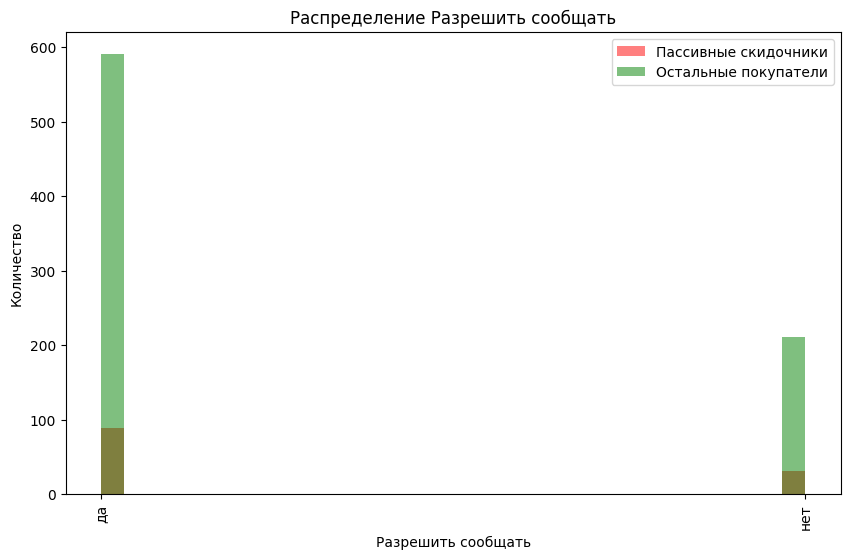

In [33]:
# Остальные покупатели, у которых активность не снизилась
other_customers = market_file[market_file['Покупательская активность'] != 'Снизилась']

# Анализ покупательской активности
activity_columns = (['Прибыль', 'Популярная_категория', 'Длительность', 
                     'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 
                     'Неоплаченные_продукты_штук_квартал', 'Страниц_за_визит', 
                     'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 
                     'выручка_текущий_месяц', 'минут_предыдущий_месяц', 
                     'минут_текущий_месяц', 'Разрешить сообщать']
                   )
activity_data = passive_discounters[activity_columns]

# Визуализация покупательской активности
for column in activity_columns:
    plt.figure(figsize=(10, 6))
    
    # Пассивные скидочники
    plt.hist(passive_discounters[column], bins=30, alpha=0.5, color='r', label='Пассивные скидочники')
    
    # Остальные покупатели
    plt.hist(other_customers[column], bins=30, alpha=0.5, color='g', label='Остальные покупатели')
    
    
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.legend()
    
    # Поворот названий категорий на вертикальные оси
    if market_file[column].dtype == 'object':
        plt.xticks(rotation='vertical')
    
    plt.show()


In [34]:
# Добавление общих столбцов
passive_discounters['Общая_выручка_3_месяца'] = passive_discounters[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']].sum(axis=1)
other_customers['Общая_выручка_3_месяца'] = other_customers[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']].sum(axis=1)

passive_discounters['Общие_минуты_2_месяца'] = passive_discounters[['минут_предыдущий_месяц', 'минут_текущий_месяц']].sum(axis=1)
other_customers['Общие_минуты_2_месяца'] = other_customers[['минут_предыдущий_месяц', 'минут_текущий_месяц']].sum(axis=1)

# Обновление списка столбцов для анализа
activity_columns += ['Общая_выручка_3_месяца', 'Общие_минуты_2_месяца']

# Создаем пустой DataFrame для хранения результатов
comparison_table = pd.DataFrame()

# Проходим по каждому столбцу в данных
for column in activity_columns:
    # Если тип данных столбца - object, то это категориальные данные
    if passive_discounters[column].dtype == 'object':
        comparison_table.loc['Мода (Пассивные скидочники)', column] = passive_discounters[column].mode()[0]
        comparison_table.loc['Мода (Остальные покупатели)', column] = other_customers[column].mode()[0]
    else:
        # Иначе это числовые данные
        comparison_table.loc['Медиана (Пассивные скидочники)', column] = passive_discounters[column].median()
        comparison_table.loc['Медиана (Остальные покупатели)', column] = other_customers[column].median()

# Выводим таблицу сравнения
# Транспонирование таблицы для удобства просмотра
display(comparison_table.transpose())





C:\Users\ivano\AppData\Local\Temp\ipykernel_25000\465720941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passive_discounters['Общая_выручка_3_месяца'] = passive_discounters[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']].sum(axis=1)
C:\Users\ivano\AppData\Local\Temp\ipykernel_25000\465720941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_customers['Общая_выручка_3_месяца'] = other_customers[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'в

,Медиана (Пассивные скидочники),Медиана (Остальные покупатели),Мода (Пассивные скидочники),Мода (Остальные покупатели)
Прибыль,3.92,4.04,NaN,NaN
Популярная_категория,NaN,NaN,Товары для детей,Товары для детей
Длительность,598.0,590.0,NaN,NaN
Акционные_покупки,0.9,0.21,NaN,NaN
Средний_просмотр_категорий_за_визит,2.0,4.0,NaN,NaN
Неоплаченные_продукты_штук_квартал,5.0,2.0,NaN,NaN
Страниц_за_визит,4.0,10.0,NaN,NaN
выручка_препредыдущий_месяц,4600.0,4927.0,NaN,NaN
выручка_предыдущий_месяц,5157.0,4977.25,NaN,NaN
выручка_текущий_месяц,5339.6,5122.55,NaN,NaN


На основе представленных данных, можно сделать следующие выводы:


- **Акционные покупки**: Пассивные скидочники в среднем совершают больше акционных покупок (0.9 против 0.21 у остальных покупателей).
- **Длительность**: Средняя длительность посещения сайта примерно одинакова для обеих групп покупателей (598 минут у пассивных скидочников против 590 минут у остальных покупателей).
- **Неоплаченные продукты**: Пассивные скидочники в среднем оставляют больше неоплаченных продуктов (5.0 против 2.0 у остальных покупателей).
- **Общая выручка за 3 месяца**: Общая выручка за последние три месяца примерно одинакова для обеих групп покупателей (15145.7 у пассивных скидочников против 15107.75 у остальных покупателей).
- **Общее время на сайте за 2 месяца**: Остальные покупатели в среднем проводят на сайте больше времени (30.0 минут против 20.0 минут у пассивных скидочников).
- **Популярная категория**: Для обеих групп покупателей самой популярной категорией являются товары для детей.
- **Прибыль**: Средняя прибыль от остальных покупателей немного выше, чем от пассивных скидочников (4.04 против 3.92).
- **Разрешение на рассылку**: Большинство покупателей из обеих групп разрешили рассылку.
- **Средний просмотр категорий за визит**: Остальные покупатели в среднем просматривают больше категорий за визит (4.0 против 2.0 у пассивных скидочников).
- **Страниц за визит**: Остальные покупатели в среднем просматривают больше страниц за визит (10.0 против 4.0 у пассивных скидочников).


Вот несколько предложений по работе с сегментом "Пассивные скидочники" для увеличения покупательской активности:

1. **Увеличение количества акций**: Поскольку этот сегмент покупателей часто совершает акционные покупки, можно увеличить количество акций и скидок, чтобы стимулировать их активность.

2. **Оптимизация времени на сайте**: Учитывая, что эти покупатели проводят меньше времени на сайте, можно оптимизировать пользовательский интерфейс и упростить процесс покупки, чтобы они могли быстрее находить то, что им нужно.

3. **Улучшение системы рекомендаций**: Поскольку эти покупатели часто просматривают меньше категорий за визит, можно улучшить систему рекомендаций, чтобы предлагать им товары, которые могут их заинтересовать.

4. **Работа с неоплаченными продуктами**: Учитывая, что эти покупатели часто оставляют неоплаченные продукты, можно предложить им специальные скидки или напоминания о них, чтобы стимулировать их к покупке.

5. **Персонализированные предложения**: Используйте данные о популярных категориях для создания персонализированных предложений и рекламных акций, которые могут привлечь внимание этих покупателей.

6. **Сообщения и уведомления**: Поскольку большинство покупателей из этого сегмента разрешили рассылку, можно использовать этот канал для отправки персонализированных предложений и напоминаний о неоплаченных продуктах.

Эти стратегии могут помочь увеличить покупательскую активность среди пассивных скидочников и улучшить их общий опыт покупок. Пожалуйста, учтите, что эффективность этих стратегий может варьироваться и должна быть проверена с помощью A/B тестирования или других методов оценки.

В ходе анализа были исследованы два сегмента покупателей: "Пассивные скидочники" и "Остальные покупатели". Дополнительное исследование было проведено на сегменте "Пассивные скидочники", поскольку этот сегмент показал уникальные характеристики, которые отличают его от остальных покупателей. Это включает в себя большее количество акционных покупок, меньшее время проведенное на сайте, и большее количество неоплаченных продуктов.

На основе этих наблюдений были сделаны следующие предложения для работы с сегментом "Пассивные скидочники":

1. Увеличение количества акций и скидок.
2. Оптимизация пользовательского интерфейса и упрощение процесса покупки.
3. Улучшение системы рекомендаций.
4. Работа с неоплаченными продуктами через специальные скидки или напоминания.
5. Создание персонализированных предложений на основе данных о популярных категориях.
6. Использование рассылки для отправки персонализированных предложений и напоминаний.

Эти предложения были сделаны с целью увеличения покупательской активности среди пассивных скидочников и улучшения их общего опыта покупок. Они основаны на уникальных характеристиках этого сегмента, выявленных в ходе анализа. Пожалуйста, учтите, что эффективность этих стратегий может варьироваться и должна быть проверена с помощью A/B тестирования или других методов оценки.

# Шаг 9. Общий вывод

Вот общий вывод по проекту:

- Задача: Разработать решение для интернет-магазина «В один клик», которое поможет увеличить покупательскую активность постоянных клиентов через персонализированные предложения. Для этого необходимо предсказать вероятность снижения покупательской активности клиента в следующие три месяца, выделить сегменты покупателей и разработать для них персонализированные предложения.
- Исходные данные и предобработка: Данные состоят из четырех наборов данных: Market File, Market Money, Market Time и Money. В ходе предобработки были исправлены опечатки, удалены аномалии, объединены таблицы и проведен исследовательский анализ данных.
- Поиск лучшей модели: Для поиска лучшей модели были использованы четыре алгоритма классификации: логистическая регрессия, k-ближайших соседей, дерево решений и метод опорных векторов. Для каждого алгоритма была проведена кросс-валидация и подбор гиперпараметров. Качество моделей было оценено по метрике ROC-AUC.
- Лучшая модель: Логистическая  регрессия  с C=1, penalty='l1', random_state=13, solver='liblinear'  ROC-AUC равным 0.90 стала лучшей моделью. Она выявила ключевые факторы покупательской активности: время на сайте, количество просмотренных страниц и категорий, доля акционных покупок, количество неоплаченных товаров, количество маркетинговых акций, популярная категория товаров и сумма потраченных денег.
- Сегмент “Пассивные скидочники” характеризуется меньшим временем на сайте, узкой фокусировкой на товарах со скидками и большим количеством неоплаченных товаров. Для стимулирования их активности предлагается увеличить количество акций, оптимизировать интерфейс сайта, улучшить систему рекомендаций, работать с неоплаченными товарами и использовать рассылку для отправки персонализированных предложений